Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 463
Data Cleaned. Rides Removed = 466
imported


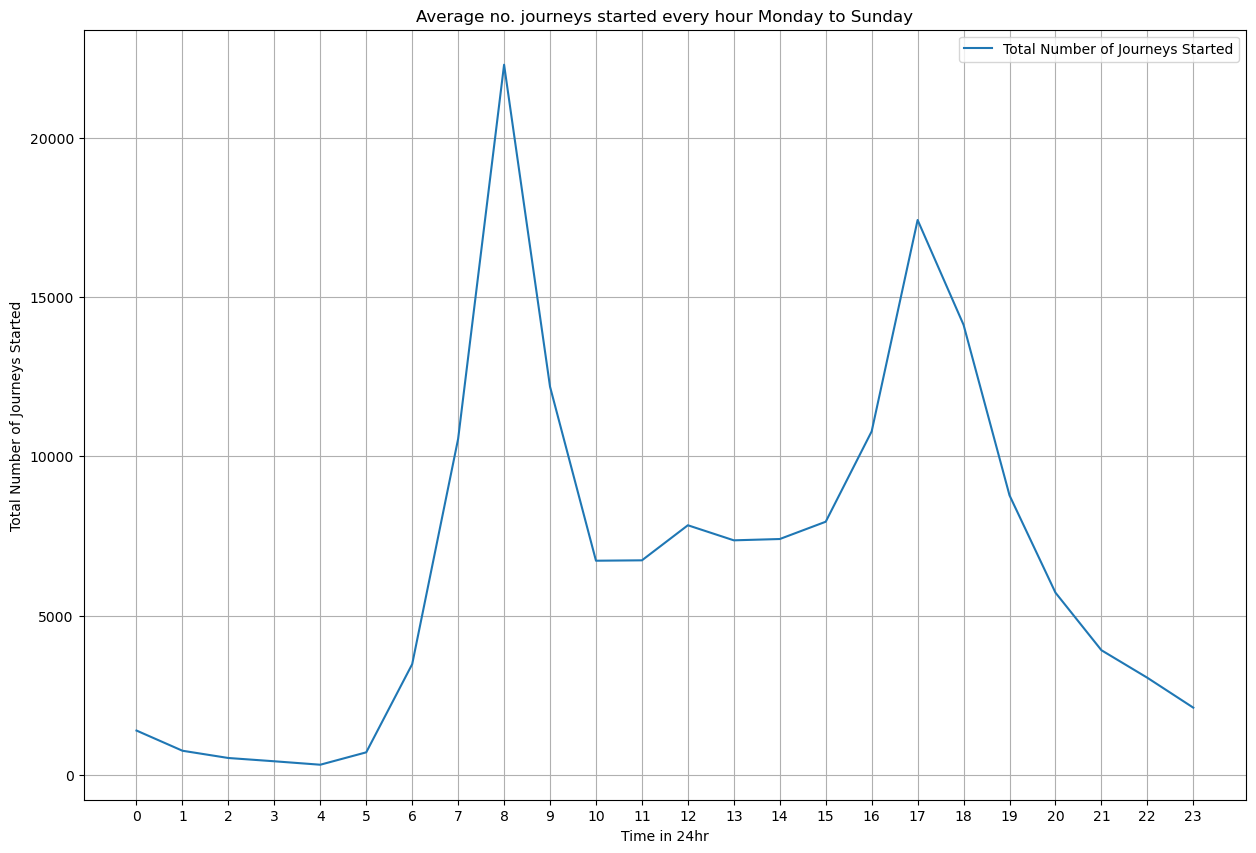

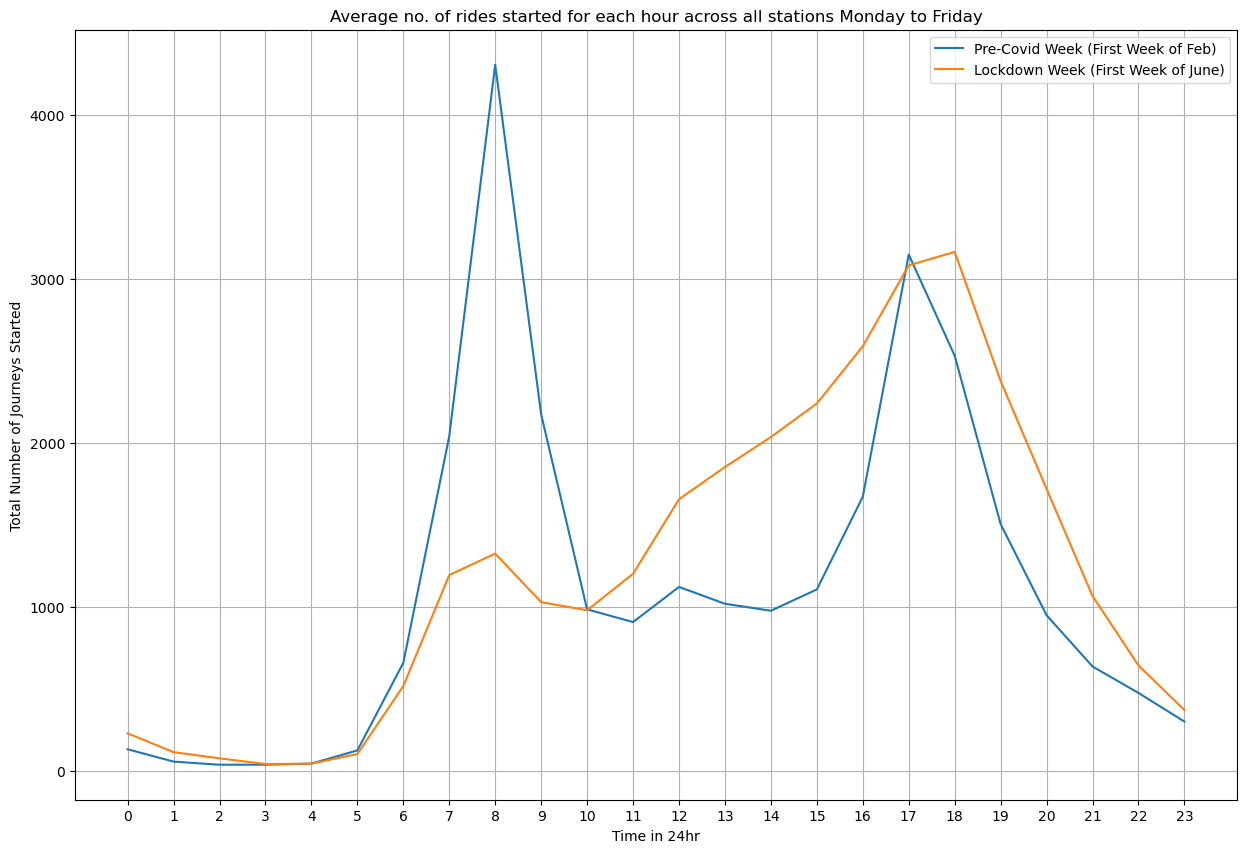

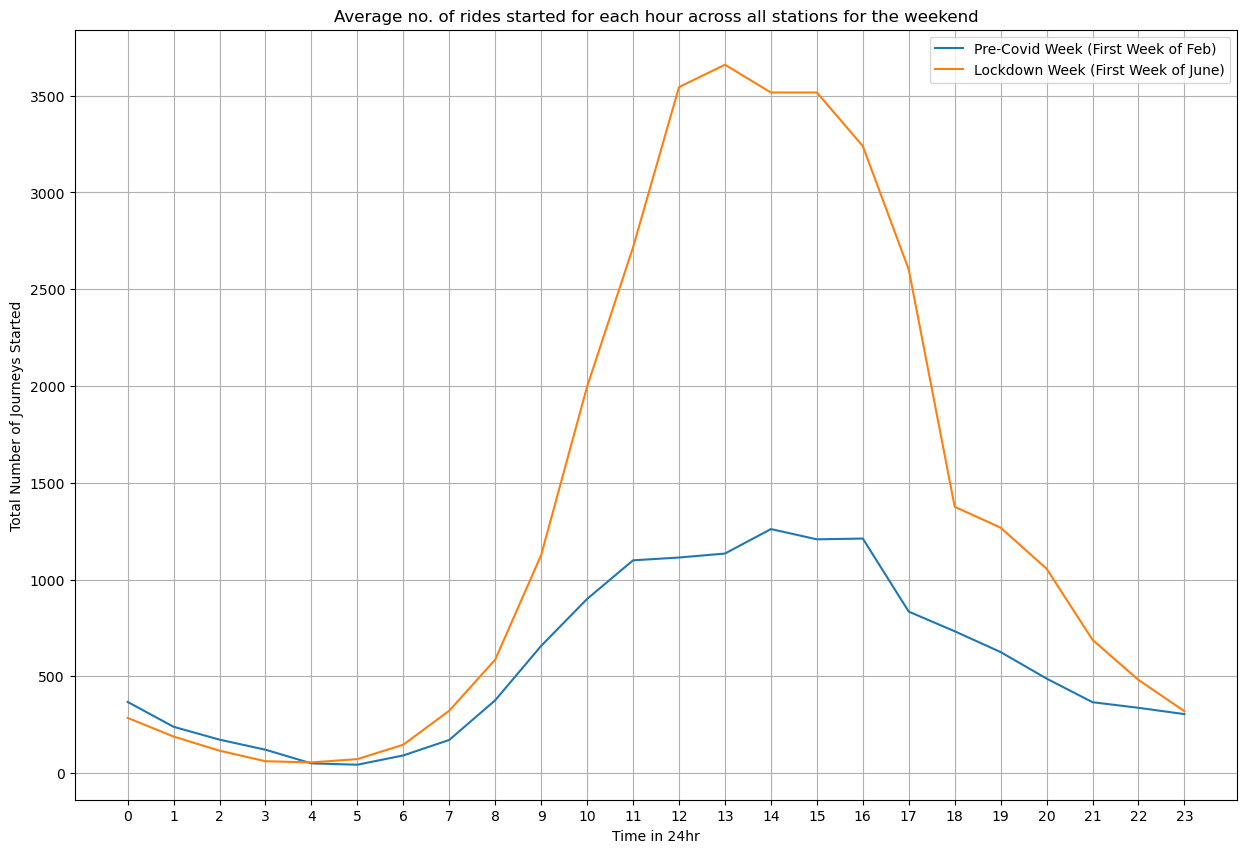

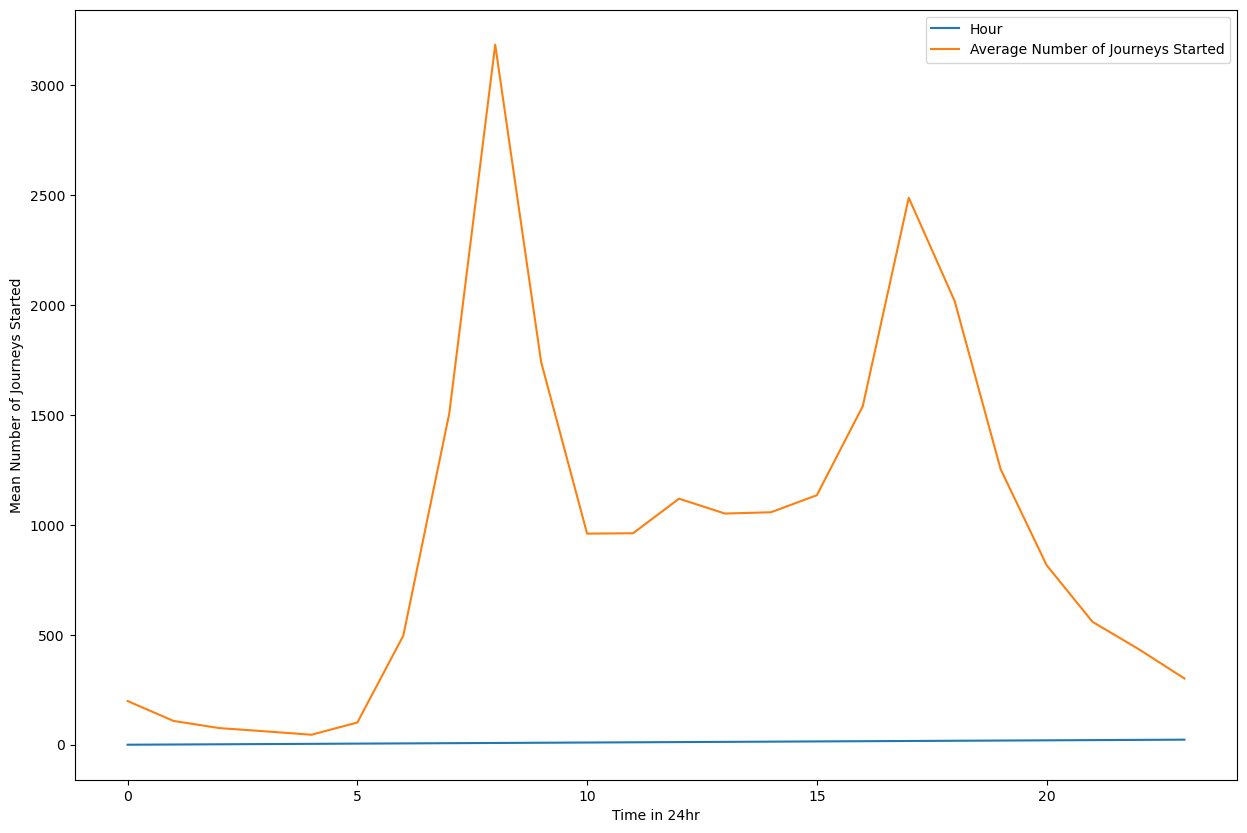

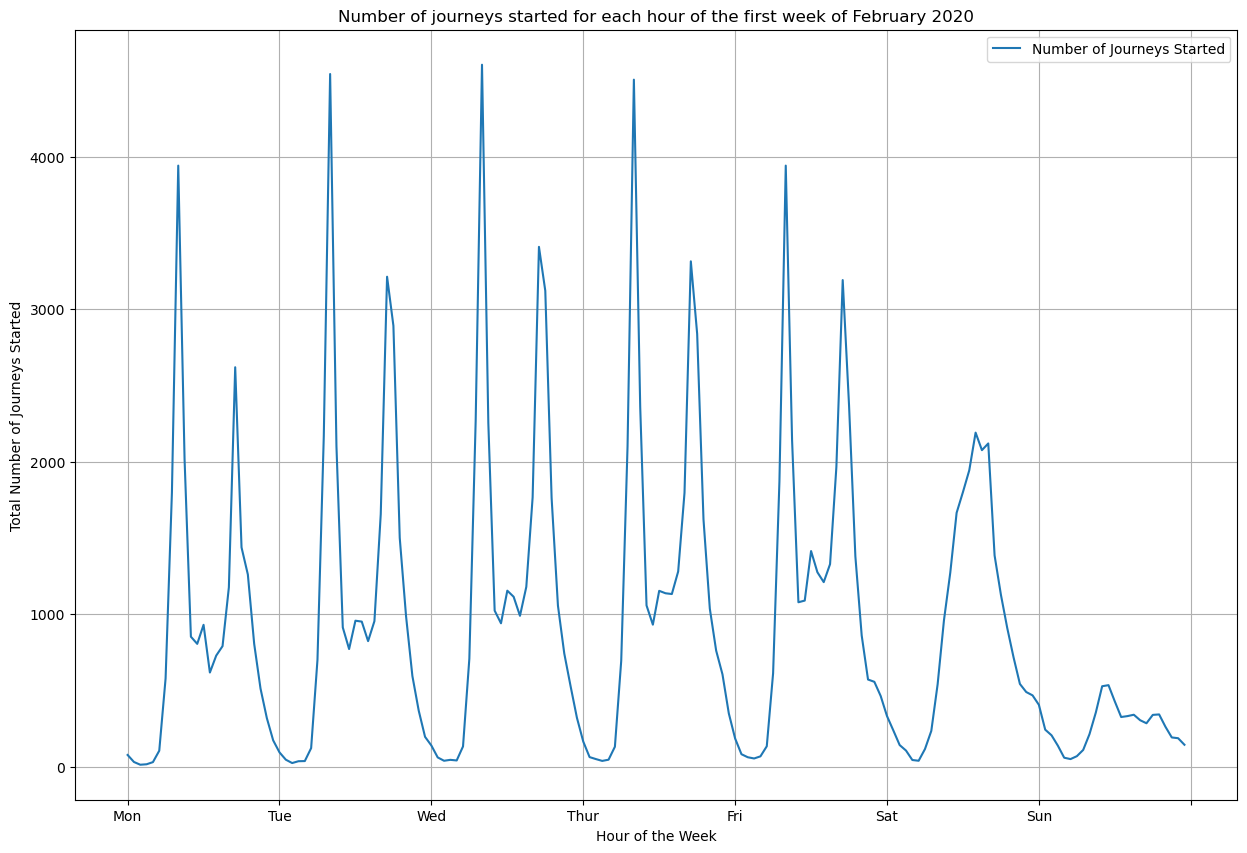

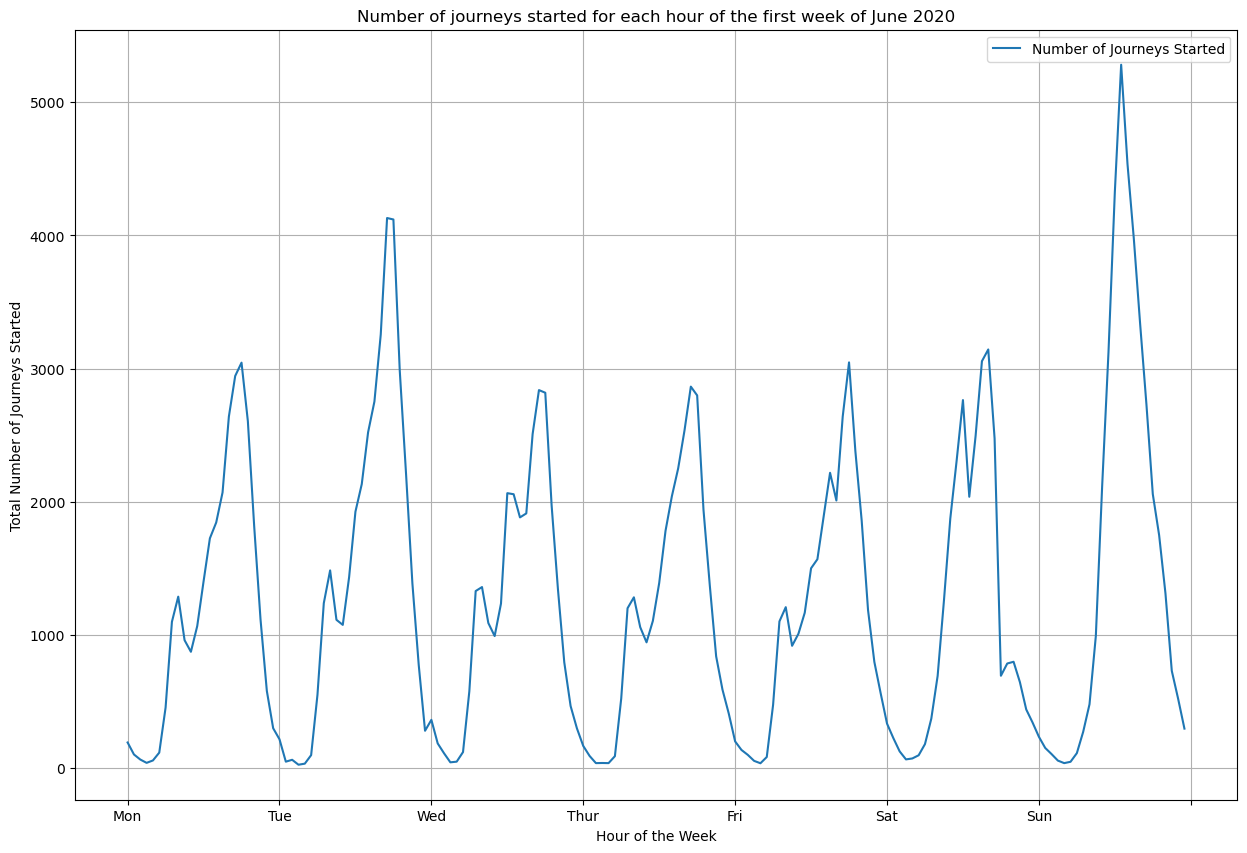

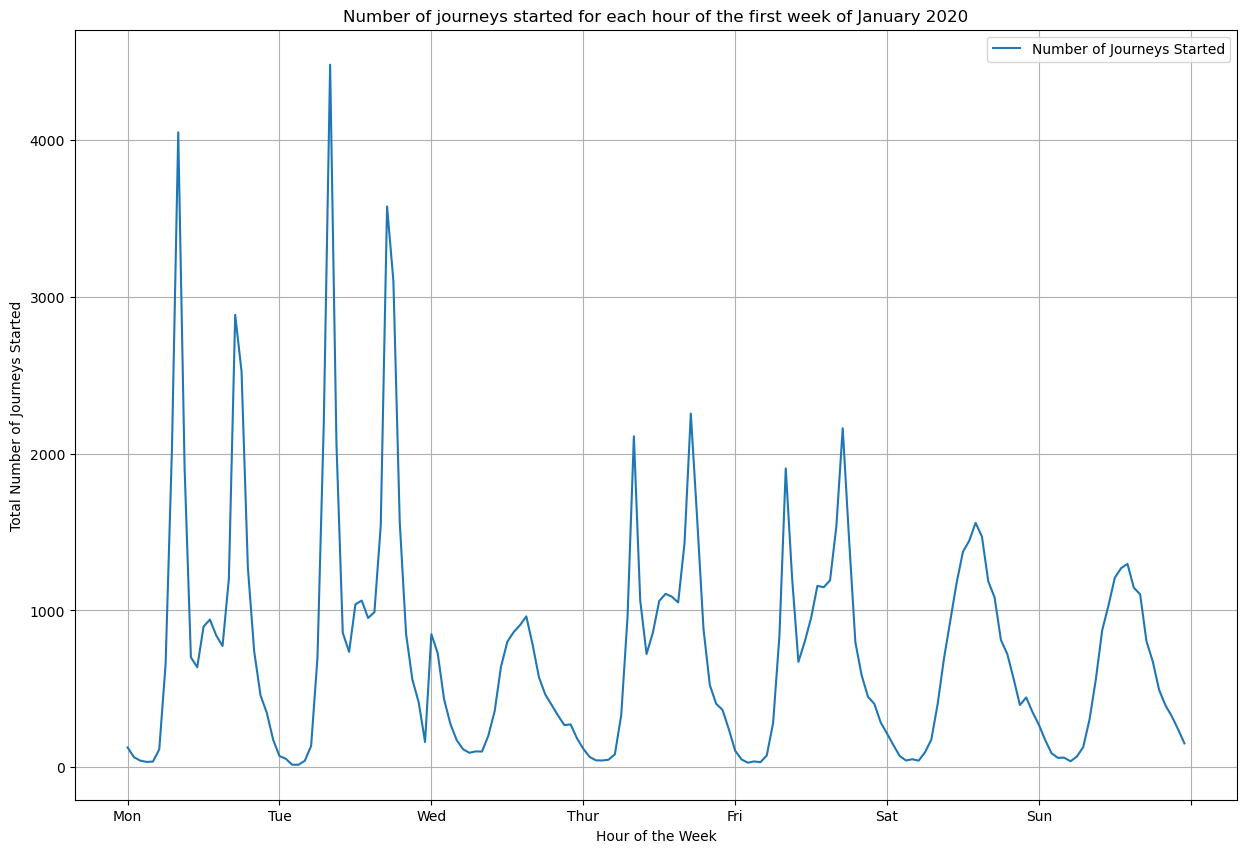

imported
imported
Empty DataFrame
Columns: [StationId, StationName, Change in number of bikes, longitude, latitude]
Index: []
imported
done


C:\Users\marya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


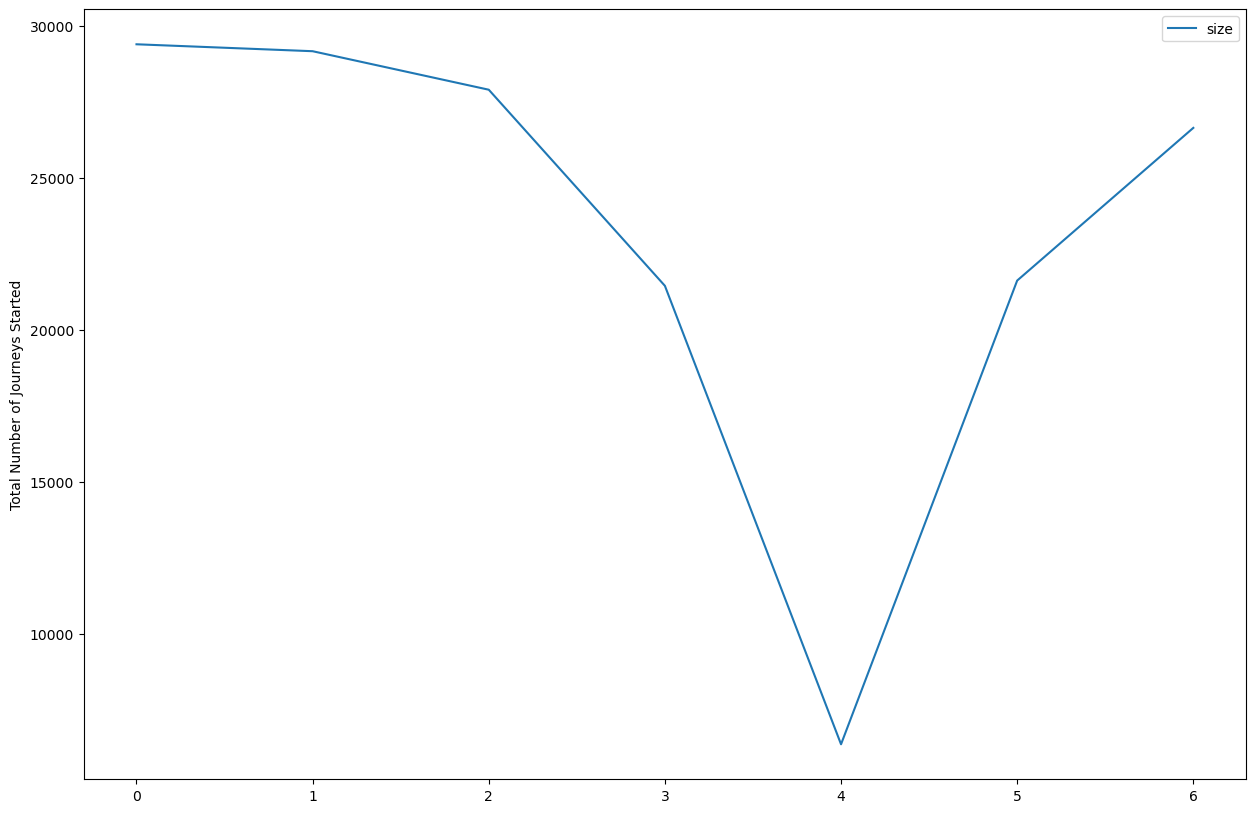

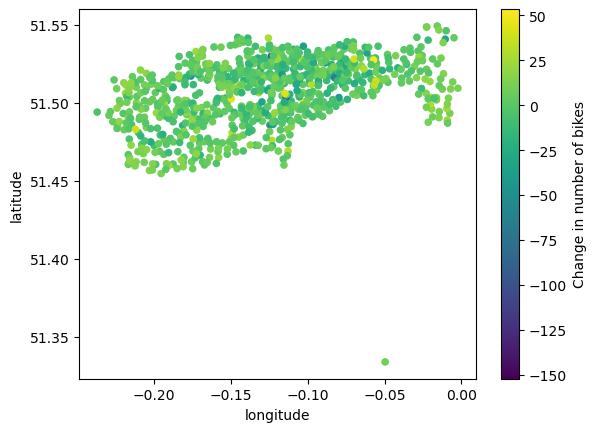

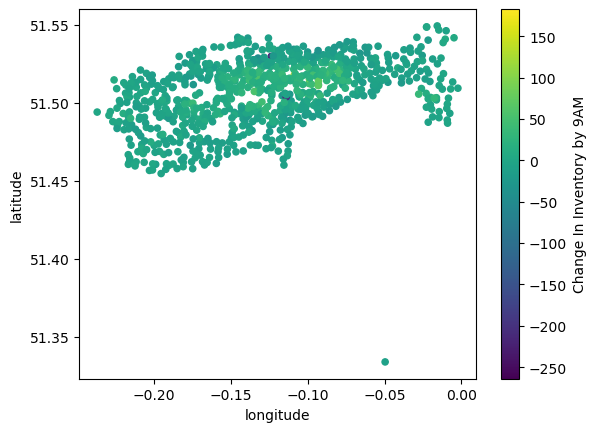

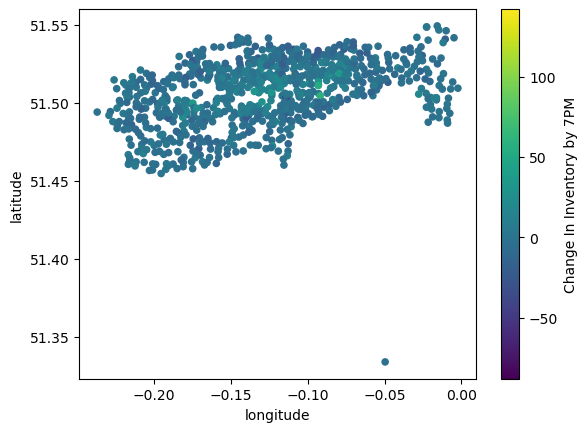

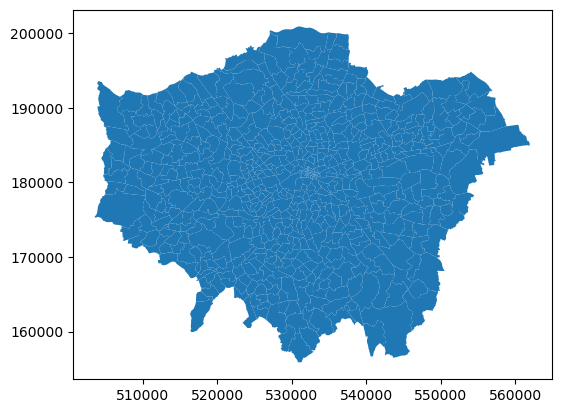

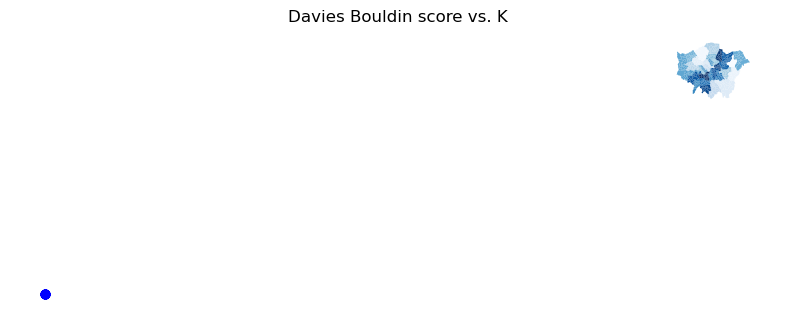

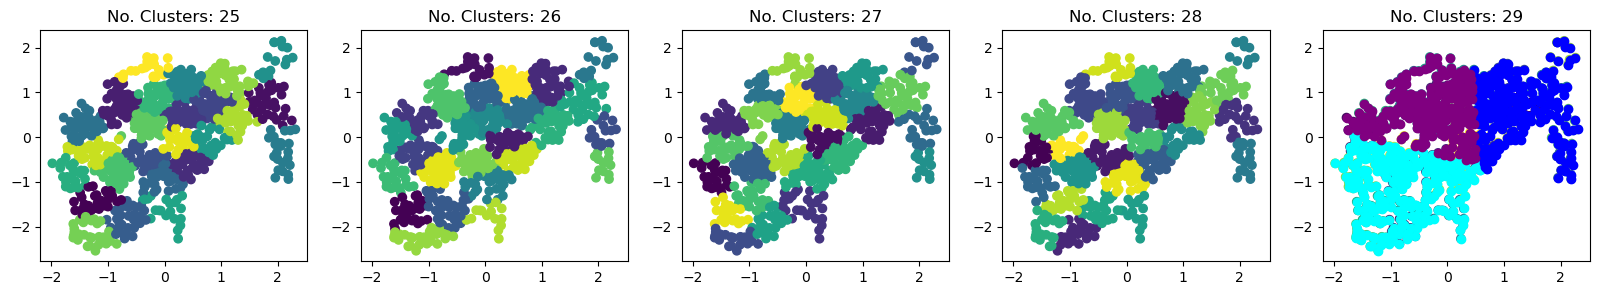

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
from ipynb.fs.full.Clustering import kClustersDF
from ipynb.fs.full.Process_Demand import getDFfromCSV, febW1DF, endAndStartedJourneys11PMDF

In [2]:
"""
K-means clustering is non-deterministic, so the clusters change everytime the code is run
The clusters may have different station names within them so the specific Station name string indexing .at[row][column]
will not work
"""

'\nK-means clustering is non-deterministic, so the clusters change everytime the code is run\nThe clusters may have different station names within them so the specific Station name string indexing .at[row][column]\nwill not work\n'

In [3]:
kClustersDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  cluster_1    long_t     lat_t  kmeans_25  kmeans_26  \
0         -5.0          0  0.339354  1.151244         11         25   
1         -9.0          2 -1.263765 -0.318032         22          5   
2          7.0          1  0.803534  0.759106          5          9   
3          0.0          0  0.138001  1.195918         11          8   
4         -1.0          2 -0.518999 -0.640677          6         24   
..         ...        ...       ...       ...        ...        ...   
797        5.0          0 -0.353953 -1.391894         14          7   
798        1.0          0  0.056237  1.766554         24          1   
799        0.0          0  0.431277  0.534992          4          9   
800        0.0          0  0.679168  0.599918          5          9   
801        3.0          0  0.396645  0.097634         23          2   

     kmeans_27  kmeans_28  kmeans_29  kmeans_3  
0            5         18         14         2  
1           19         27         27         0  
2           12          1         19         1  
3            5         18          3         2  
4           23          2          4         0  
..         ...        ...        ...       ...  
797          4         16         15         0  
798         22         25         16         2  
799         24          5         22         2  
800         12          1         19         1  
801          1         19         28         2  

[781 rows x 14 columns]

In [4]:
#clusteredStationsDF = kClustersDF.drop(["kmeans_25","kmeans_26","kmeans_27","kmeans_3","kmeans_29"], axis=1)
clusteredStationsDF = kClustersDF[["StationId","StationName","longitude","latitude","inventory","kmeans_28"]]

In [5]:
clusteredStationsDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  kmeans_28  
0         -5.0         18  
1         -9.0         27  
2          7.0          1  
3          0.0         18  
4         -1.0          2  
..         ...        ...  
797        5.0         16  
798        1.0         25  
799        0.0          5  
800        0.0          1  
801        3.0         19  

[781 rows x 6 columns]

In [6]:
# Nodes will be stations and their inventory
# The edges can be the distance between the two stations

In [7]:
#clusteredStationsDF = clusteredStationsDF.groupby('kmeans_28').agg(list)
clusteredStationsDF

StationId                           StationName  longitude   latitude  \
0            1             River Street, Clerkenwell  -0.109971  51.529200   
1            2        Phillimore Gardens, Kensington  -0.197574  51.499600   
2            3  Christopher Street, Liverpool Street  -0.084606  51.521300   
3            4       St. Chad's Street, King's Cross  -0.120974  51.530100   
4            5         Sedding Street, Sloane Square  -0.156876  51.493100   
..         ...                                   ...        ...        ...   
797        834           Gas Holders, Battersea Park  -0.147857  51.477966   
798        836                 York Way, Kings Cross  -0.125442  51.541596   
799        835            Farringdon Street, Holborn  -0.104948  51.516785   
800        838         Fore Street Avenue, Guildhall  -0.091402  51.518093   
801        839            Sea Containers, South Bank  -0.106840  51.507974   

     inventory  kmeans_28  
0         -5.0         18  
1         -9.0         27  
2          7.0          1  
3          0.0         18  
4         -1.0          2  
..         ...        ...  
797        5.0         16  
798        1.0         25  
799        0.0          5  
800        0.0          1  
801        3.0         19  

[781 rows x 6 columns]

In [8]:
networkGraphs = []
for i in range(28):
    networkGraphs.append([])

for index,row in clusteredStationsDF.iterrows():
    networkGraphs[row["kmeans_28"]].append(row)
    
def createNetworkForCluster(clusteredStationsDF):
    pass
G= nx.Graph()
len(networkGraphs[5])

40

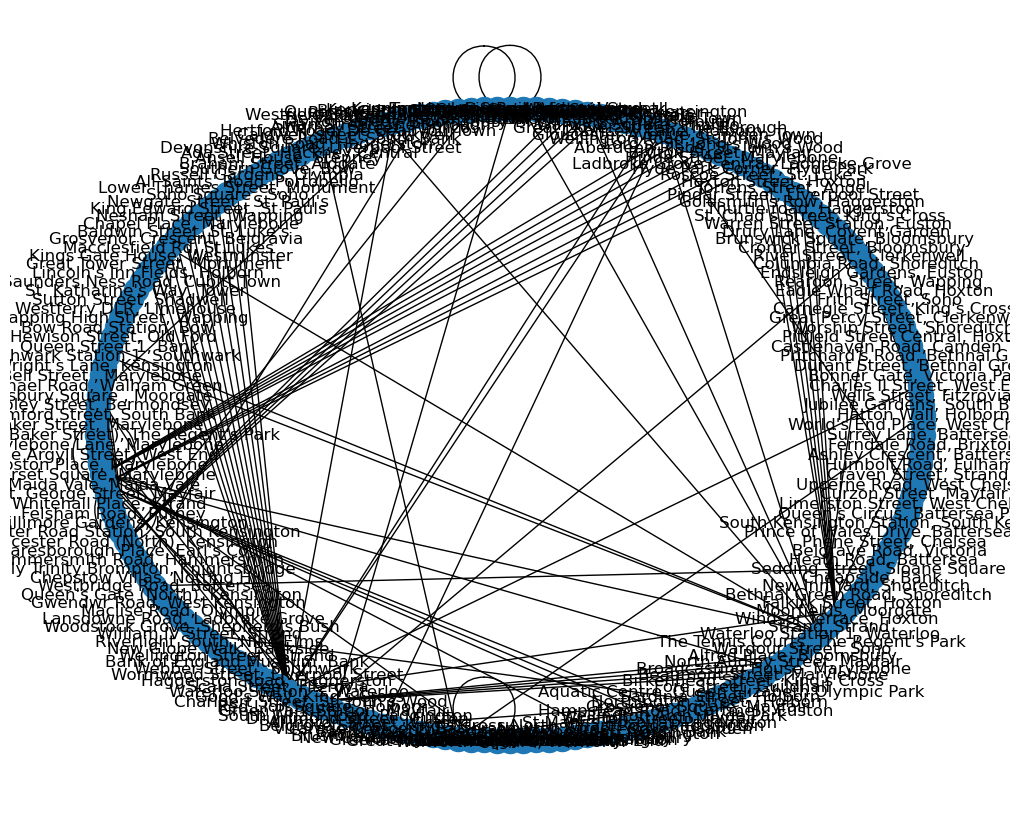

In [9]:
from matplotlib.pyplot import figure

def drawG(G):
    figure(figsize=(10, 8))
    nx.draw_shell(G, with_labels=True)

G300 = nx.from_pandas_edgelist(febW1DF[:300], 'StartStation Name', 'EndStation Name')    
drawG(G300)


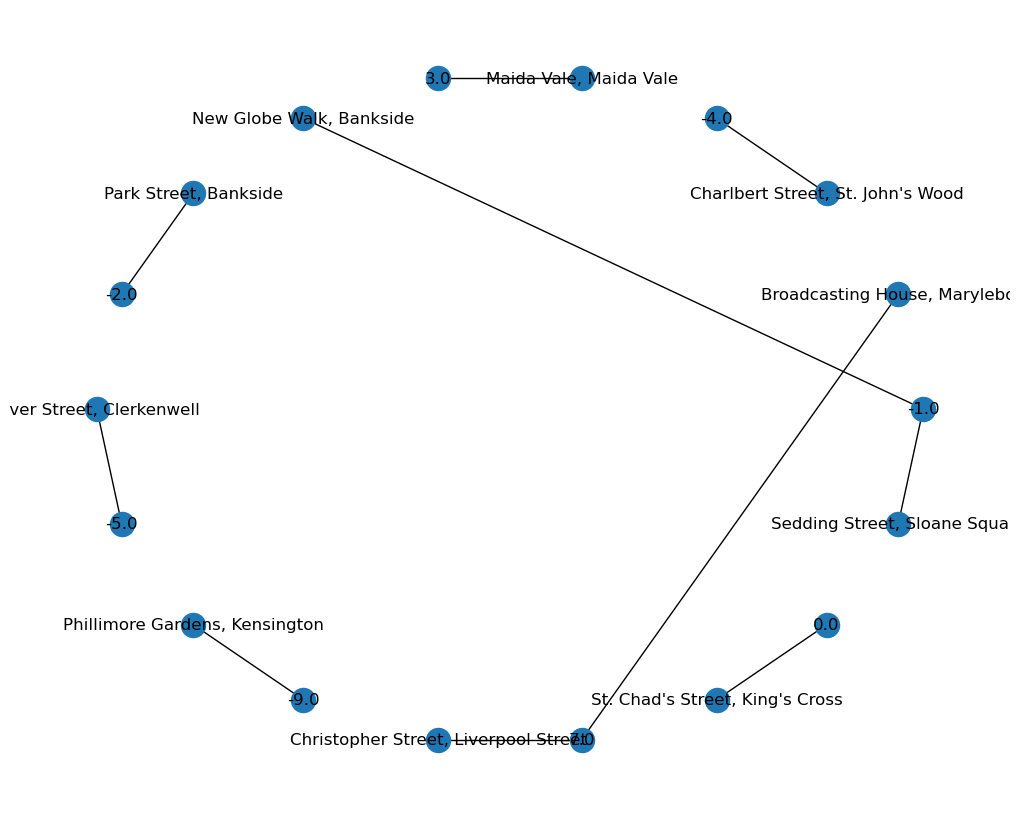

In [10]:
G3 = nx.from_pandas_edgelist(clusteredStationsDF[:10], 'StationName', 'inventory')    
drawG(G3)

In [11]:
clusteredStationsDF["kmeans_28"].isin([1])

0      False
1      False
2       True
3      False
4      False
       ...  
797    False
798    False
799    False
800     True
801    False
Name: kmeans_28, Length: 781, dtype: bool

In [12]:
cluster5DF = clusteredStationsDF.loc[clusteredStationsDF["kmeans_28"].isin([5])]
cluster5DF.index = cluster5DF.StationName
cluster5DF

StationId  \
StationName                                    
Great Russell Street, Bloomsbury          15   
Hatton Wall, Holborn                      17   
Drury Lane, Covent Garden                 18   
Northington Street, Holborn               22   
Red Lion Square, Holborn                  23   
British Museum, Bloomsbury                24   
Bouverie Street, Temple                   27   
Godliman Street, St. Paul's               48   
William IV Street, Strand                 64   
Holborn Circus, Holborn                   66   
Hatton Garden, Holborn                    67   
Theobald's Road, Holborn                  68   
Chancery Lane, Holborn                    82   
Breams Buildings, Holborn                 84   
Stonecutter Street, Holborn              112   
Queen Victoria Street, St. Paul's        136   
Southampton Place, Holborn               162   
Strand, Strand                           174   
Carey Street, Holborn                    232   
Earnshaw Street, Covent Garden           244   
Houghton Street, Strand                  256   
Kingsway, Covent Garden                  283   
Embankment (Savoy), Strand               309   
Tavistock Street, Covent Garden          335   
Wellington Street, Strand                338   
High Holborn, Covent Garden              358   
Sardinia Street, Holborn                 372   
Southampton Street, Strand               388   
Snow Hill, Farringdon                    393   
Red Lion Street, Holborn                 436   
New Fetter Lane, Holborn                 546   
Bury Place, Holborn                      562   
Somerset House, Strand                   564   
Kingsway Southbound, Strand              594   
Blackfriars Station, St. Paul's          659   
St. Bride Street, Holborn                703   
Newton Street, Covent Garden             751   
Tallis Street, Temple                    773   
Lincoln's Inn Fields, Holborn            809   
Farringdon Street, Holborn               835   

                                                         StationName  \
StationName                                                            
Great Russell Street, Bloomsbury    Great Russell Street, Bloomsbury   
Hatton Wall, Holborn                            Hatton Wall, Holborn   
Drury Lane, Covent Garden                  Drury Lane, Covent Garden   
Northington Street, Holborn              Northington Street, Holborn   
Red Lion Square, Holborn                    Red Lion Square, Holborn   
British Museum, Bloomsbury                British Museum, Bloomsbury   
Bouverie Street, Temple                      Bouverie Street, Temple   
Godliman Street, St. Paul's              Godliman Street, St. Paul's   
William IV Street, Strand                  William IV Street, Strand   
Holborn Circus, Holborn                      Holborn Circus, Holborn   
Hatton Garden, Holborn                        Hatton Garden, Holborn   
Theobald's Road, Holborn                    Theobald's Road, Holborn   
Chancery Lane, Holborn                        Chancery Lane, Holborn   
Breams Buildings, Holborn                  Breams Buildings, Holborn   
Stonecutter Street, Holborn              Stonecutter Street, Holborn   
Queen Victoria Street, St. Paul's  Queen Victoria Street, St. Paul's   
Southampton Place, Holborn                Southampton Place, Holborn   
Strand, Strand                                        Strand, Strand   
Carey Street, Holborn                          Carey Street, Holborn   
Earnshaw Street, Covent Garden        Earnshaw Street, Covent Garden   
Houghton Street, Strand                      Houghton Street, Strand   
Kingsway, Covent Garden                      Kingsway, Covent Garden   
Embankment (Savoy), Strand                Embankment (Savoy), Strand   
Tavistock Street, Covent Garden      Tavistock Street, Covent Garden   
Wellington Street, Strand                  Wellington Street, Strand   
High Holborn, Covent Garden              High Holborn, Covent Garden   
Sa

In [13]:
(cluster5DF.StationName).tolist()


['Great Russell Street, Bloomsbury',
 'Hatton Wall, Holborn',
 'Drury Lane, Covent Garden',
 'Northington Street, Holborn',
 'Red Lion Square, Holborn',
 'British Museum, Bloomsbury',
 'Bouverie Street, Temple',
 "Godliman Street, St. Paul's",
 'William IV Street, Strand',
 'Holborn Circus, Holborn',
 'Hatton Garden, Holborn',
 "Theobald's Road, Holborn",
 'Chancery Lane, Holborn',
 'Breams Buildings, Holborn',
 'Stonecutter Street, Holborn',
 "Queen Victoria Street, St. Paul's",
 'Southampton Place, Holborn',
 'Strand, Strand',
 'Carey Street, Holborn',
 'Earnshaw Street, Covent Garden',
 'Houghton Street, Strand',
 'Kingsway, Covent Garden',
 'Embankment (Savoy), Strand',
 'Tavistock Street, Covent Garden',
 'Wellington Street, Strand',
 'High Holborn, Covent Garden',
 'Sardinia Street, Holborn',
 'Southampton Street, Strand',
 'Snow Hill, Farringdon',
 'Red Lion Street, Holborn',
 'New Fetter Lane, Holborn',
 'Bury Place, Holborn',
 'Somerset House, Strand',
 'Kingsway Southbound, S

In [14]:
# Create Distance Matrix for all the stations in this cluster
distMatrixDF = pd.DataFrame(columns=cluster5DF.StationName.tolist(),
                           index=cluster5DF.StationName.tolist())

for index,row in cluster5DF.iterrows():
    currentStation = row["StationName"]
    currentLongLat = [row["longitude"], row["latitude"]]
    
    for index2,row2 in cluster5DF.iterrows():
        currentStation2 = row2["StationName"]
        currentLongLat2 = [row2["longitude"], row2["latitude"]]
        distance = math.dist(currentLongLat,currentLongLat2)
        distMatrixDF.at[currentStation, currentStation2] = distance
    
distMatrixDF

Great Russell Street, Bloomsbury  \
Great Russell Street, Bloomsbury                               0.0   
Hatton Wall, Holborn                                      0.019268   
Drury Lane, Covent Garden                                 0.006337   
Northington Street, Holborn                               0.014523   
Red Lion Square, Holborn                                  0.008895   
British Museum, Bloomsbury                                0.003471   
Bouverie Street, Temple                                   0.020304   
Godliman Street, St. Paul's                                0.02918   
William IV Street, Strand                                 0.008768   
Holborn Circus, Holborn                                   0.019199   
Hatton Garden, Holborn                                    0.019856   
Theobald's Road, Holborn                                  0.011536   
Chancery Lane, Holborn                                    0.016942   
Breams Buildings, Holborn                                 0.016176   
Stonecutter Street, Holborn                               0.022664   
Queen Victoria Street, St. Paul's                         0.030942   
Southampton Place, Holborn                                0.006527   
Strand, Strand                                            0.013715   
Carey Street, Holborn                                      0.01534   
Earnshaw Street, Covent Garden                            0.001759   
Houghton Street, Strand                                   0.011824   
Kingsway, Covent Garden                                   0.009939   
Embankment (Savoy), Strand                                0.011965   
Tavistock Street, Covent Garden                           0.009132   
Wellington Street, Strand                                 0.010111   
High Holborn, Covent Garden                               0.003754   
Sardinia Street, Holborn                                  0.010299   
Southampton Street, Strand                                0.009305   
Snow Hill, Farringdon                                     0.024253   
Red Lion Street, Holborn                                  0.011315   
New Fetter Lane, Holborn                                  0.019869   
Bury Place, Holborn                                       0.004508   
Somerset House, Strand                                    0.012868   
Kingsway Southbound, Strand                               0.010772   
Blackfriars Station, St. Paul's                           0.025437   
St. Bride Street, Holborn                                  0.02266   
Newton Street, Covent Garden                              0.007127   
Tallis Street, Temple                                      0.02131   
Lincoln's Inn Fields, Holborn                             0.012992   
Farringdon Street, Holborn                                0.022924   

                                  Hatton Wall, Holborn  \
Great Russell Street, Bloomsbury              0.019268   
Hatton Wall, Holborn                               0.0   
Drury Lane, Covent Garden                     0.014907   
Northington Street, Holborn                   0.005108   
Red Lion Square, Holborn                      0.010375   
British Museum, Bloomsbury                    0.015886   
Bouverie Street, Temple                       0.007973   
Godliman Street, St. Paul's                   0.013489   
William IV Street, Strand                     0.019917   
Holborn Circus, Holborn                       0.003716   
Hatton Garden, Holborn                         0.00306   
Theobald's Road, Holborn                       0.00776   
Chancery Lane, Holborn                        0.007735   
Breams Buildings, Holborn                     0.006428   
Stonecutter Street, Holborn                   0.006983   
Queen Victoria Street, St. Paul's             0.015094   
Southampton Place, Holborn                    0.012986   
Strand, Strand                                 0.01107   
Carey Street, Holborn                         0.007677   
Ear

NodeView(('Great Russell Street, Bloomsbury', 0.0, 'Hatton Wall, Holborn', 9.0, 'Drury Lane, Covent Garden', -1.0, 'Northington Street, Holborn', -5.0, 'Red Lion Square, Holborn', -3.0, 'British Museum, Bloomsbury', 3.0, 'Bouverie Street, Temple', "Godliman Street, St. Paul's", 21.0, 'William IV Street, Strand', 17.0, 'Holborn Circus, Holborn', 142.0, 'Hatton Garden, Holborn', -15.0, "Theobald's Road, Holborn", -7.0, 'Chancery Lane, Holborn', 'Breams Buildings, Holborn', 'Stonecutter Street, Holborn', "Queen Victoria Street, St. Paul's", -2.0, 'Southampton Place, Holborn', 1.0, 'Strand, Strand', 6.0, 'Carey Street, Holborn', 'Earnshaw Street, Covent Garden', 'Houghton Street, Strand', 2.0, 'Kingsway, Covent Garden', 5.0, 'Embankment (Savoy), Strand', 'Tavistock Street, Covent Garden', 22.0, 'Wellington Street, Strand', 'High Holborn, Covent Garden', 'Sardinia Street, Holborn', 'Southampton Street, Strand', 'Snow Hill, Farringdon', -10.0, 'Red Lion Street, Holborn', 'New Fetter Lane, Ho

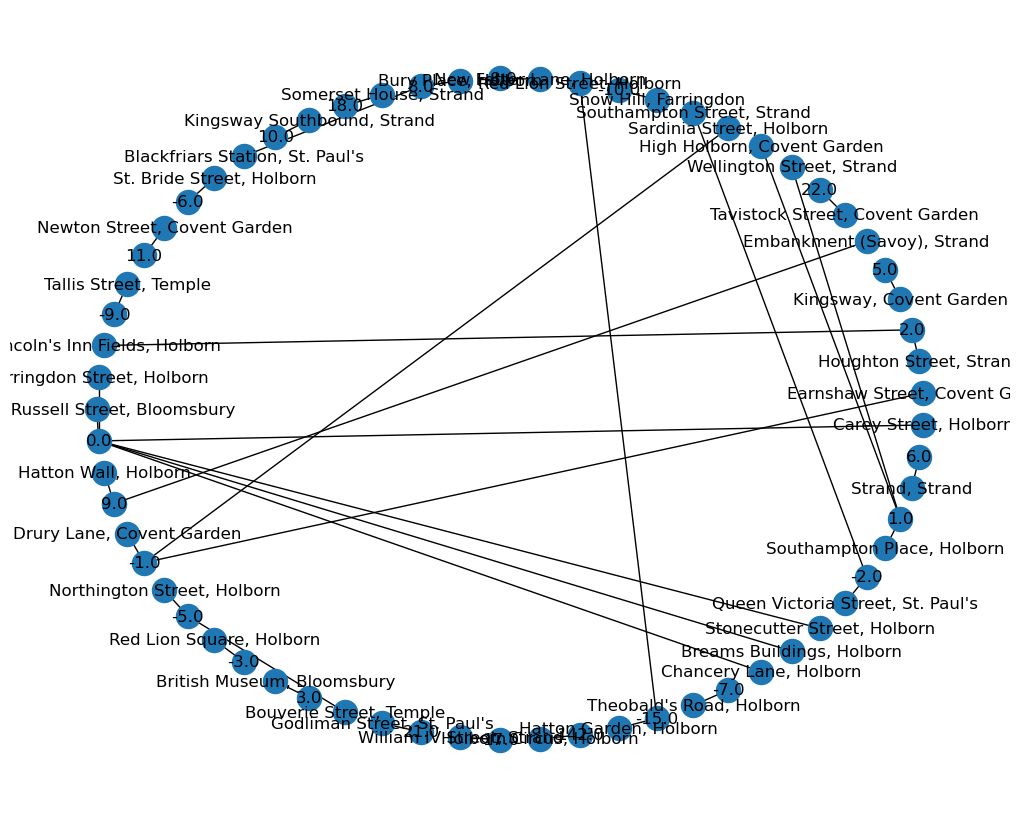

In [15]:
G3 = nx.from_pandas_edgelist(cluster5DF,'StationName', 'inventory')    
nodes=G3.nodes()
drawG(G3)
nodes

In [16]:
#cluster5DF.loc[cluster5DF["StationName"].isin([name])].inventory

In [17]:
stationNameList = cluster5DF["StationName"].tolist()

In [18]:
inventoryNameDict = cluster5DF[["StationName","inventory"]].to_dict()
inventoryNameDict

{'StationName': {'Great Russell Street, Bloomsbury': 'Great Russell Street, Bloomsbury',
  'Hatton Wall, Holborn': 'Hatton Wall, Holborn',
  'Drury Lane, Covent Garden': 'Drury Lane, Covent Garden',
  'Northington Street, Holborn': 'Northington Street, Holborn',
  'Red Lion Square, Holborn': 'Red Lion Square, Holborn',
  'British Museum, Bloomsbury': 'British Museum, Bloomsbury',
  'Bouverie Street, Temple': 'Bouverie Street, Temple',
  "Godliman Street, St. Paul's": "Godliman Street, St. Paul's",
  'William IV Street, Strand': 'William IV Street, Strand',
  'Holborn Circus, Holborn': 'Holborn Circus, Holborn',
  'Hatton Garden, Holborn': 'Hatton Garden, Holborn',
  "Theobald's Road, Holborn": "Theobald's Road, Holborn",
  'Chancery Lane, Holborn': 'Chancery Lane, Holborn',
  'Breams Buildings, Holborn': 'Breams Buildings, Holborn',
  'Stonecutter Street, Holborn': 'Stonecutter Street, Holborn',
  "Queen Victoria Street, St. Paul's": "Queen Victoria Street, St. Paul's",
  'Southampton 

In [19]:
cluster5DF.loc[cluster5DF["StationName"].isin(["Putney Pier, Wandsworth"])].inventory

Series([], Name: inventory, dtype: float64)

In [20]:
cluster5DF

StationId  \
StationName                                    
Great Russell Street, Bloomsbury          15   
Hatton Wall, Holborn                      17   
Drury Lane, Covent Garden                 18   
Northington Street, Holborn               22   
Red Lion Square, Holborn                  23   
British Museum, Bloomsbury                24   
Bouverie Street, Temple                   27   
Godliman Street, St. Paul's               48   
William IV Street, Strand                 64   
Holborn Circus, Holborn                   66   
Hatton Garden, Holborn                    67   
Theobald's Road, Holborn                  68   
Chancery Lane, Holborn                    82   
Breams Buildings, Holborn                 84   
Stonecutter Street, Holborn              112   
Queen Victoria Street, St. Paul's        136   
Southampton Place, Holborn               162   
Strand, Strand                           174   
Carey Street, Holborn                    232   
Earnshaw Street, Covent Garden           244   
Houghton Street, Strand                  256   
Kingsway, Covent Garden                  283   
Embankment (Savoy), Strand               309   
Tavistock Street, Covent Garden          335   
Wellington Street, Strand                338   
High Holborn, Covent Garden              358   
Sardinia Street, Holborn                 372   
Southampton Street, Strand               388   
Snow Hill, Farringdon                    393   
Red Lion Street, Holborn                 436   
New Fetter Lane, Holborn                 546   
Bury Place, Holborn                      562   
Somerset House, Strand                   564   
Kingsway Southbound, Strand              594   
Blackfriars Station, St. Paul's          659   
St. Bride Street, Holborn                703   
Newton Street, Covent Garden             751   
Tallis Street, Temple                    773   
Lincoln's Inn Fields, Holborn            809   
Farringdon Street, Holborn               835   

                                                         StationName  \
StationName                                                            
Great Russell Street, Bloomsbury    Great Russell Street, Bloomsbury   
Hatton Wall, Holborn                            Hatton Wall, Holborn   
Drury Lane, Covent Garden                  Drury Lane, Covent Garden   
Northington Street, Holborn              Northington Street, Holborn   
Red Lion Square, Holborn                    Red Lion Square, Holborn   
British Museum, Bloomsbury                British Museum, Bloomsbury   
Bouverie Street, Temple                      Bouverie Street, Temple   
Godliman Street, St. Paul's              Godliman Street, St. Paul's   
William IV Street, Strand                  William IV Street, Strand   
Holborn Circus, Holborn                      Holborn Circus, Holborn   
Hatton Garden, Holborn                        Hatton Garden, Holborn   
Theobald's Road, Holborn                    Theobald's Road, Holborn   
Chancery Lane, Holborn                        Chancery Lane, Holborn   
Breams Buildings, Holborn                  Breams Buildings, Holborn   
Stonecutter Street, Holborn              Stonecutter Street, Holborn   
Queen Victoria Street, St. Paul's  Queen Victoria Street, St. Paul's   
Southampton Place, Holborn                Southampton Place, Holborn   
Strand, Strand                                        Strand, Strand   
Carey Street, Holborn                          Carey Street, Holborn   
Earnshaw Street, Covent Garden        Earnshaw Street, Covent Garden   
Houghton Street, Strand                      Houghton Street, Strand   
Kingsway, Covent Garden                      Kingsway, Covent Garden   
Embankment (Savoy), Strand                Embankment (Savoy), Strand   
Tavistock Street, Covent Garden      Tavistock Street, Covent Garden   
Wellington Street, Strand                  Wellington Street, Strand   
High Holborn, Covent Garden              High Holborn, Covent Garden   
Sa

In [21]:
#cluster5DF.at["Putney Pier, Wandsworth", "inventory"]

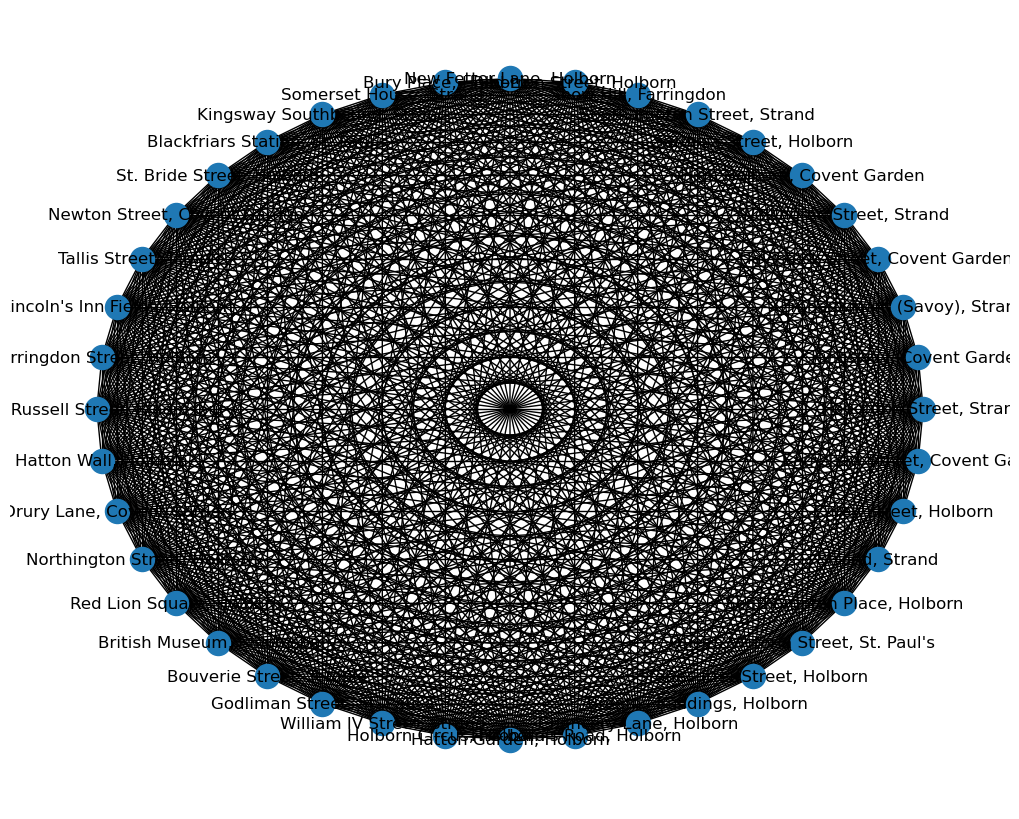

In [22]:
#G4 = nx.from_pandas_edgelist(distMatrixDF, "index", "columns")    

g5 = nx.Graph()
for name in stationNameList:
    # Add Inventory as an attribute to each node
    #g5.add_node(name, inventory=cluster5DF.loc[cluster5DF["StationName"].isin([name])].inventory)
    g5.add_node(name, inventory=cluster5DF.at[name, "inventory"])
    #g5.add_node(name, attr_dict=inventoryNameDict)

for name in stationNameList:
    for name2 in stationNameList:
        # Build connections between all the nodes w distance as the weight
        if name != name2:
            g5.add_edge(name, name2, weight= distMatrixDF.loc[name, name2])
    
    

#g5 = g5.add_nodes_from(cluster5DF["StationName"].tolist())
#for index,row in cluster5DF.iterrows():    
    #currentStation = row["StationName"]
    #currentLongLat = [row["longitude"], row["latitude"]]
    
    
#nx.draw(g5)
drawG(g5)
#nx.draw_random(g5)



In [23]:
N=800
value =N + (N * (N - 3)) / 2
value

319600.0

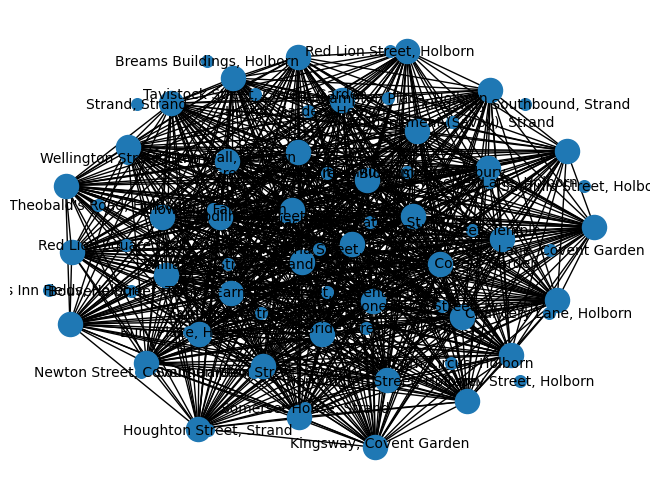

In [24]:
nx.draw(g5)
elarge = [(u, v) for (u, v, d) in g5.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in g5.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(g5, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g5, pos, node_size=70)

# edges
#nx.draw_networkx_edges(g5, pos, edgelist=elarge, width=6)
#nx.draw_networkx_edges(g5, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

# node labels
nx.draw_networkx_labels(g5, pos, font_size=10, font_family="sans-serif")
# edge weight labels
#edge_labels = nx.get_edge_attributes(g5, "weight")
#nx.draw_networkx_edge_labels(g5, pos, edge_labels)

#ax = plt.gca()
#ax.margins(0.08)
#plt.axis("off")
#plt.tight_layout()
plt.show()

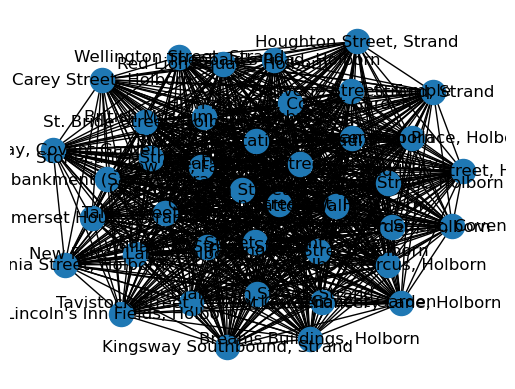

In [25]:
pos=nx.spring_layout(g5, scale=100.)
nx.draw_networkx_nodes(g5, pos)
nx.draw_networkx_edges(g5,pos)
nx.draw_networkx_labels(g5,pos)
plt.axis('off')
plt.show()

# N-Nearest Neighbour

In [26]:
totalChangeInCluster =0
totalBikesRepositioned =0

balancedNodes = []
for node in g5.nodes(): # or node in g.nodes_iter():
    #print (g5.nodes[node]["inventory"])
    totalChangeInCluster += g5.nodes[node]["inventory"]
    if (g5.nodes[node]["inventory"]>0):
        totalBikesRepositioned+=g5.nodes[node]["inventory"]
    elif (g5.nodes[node]["inventory"]==0): #Remove any nodes with 0 change in inventory
        balancedNodes.append(node)
        
for node in balancedNodes:(g5.remove_node(node))
        
print("THE TOTAL CHANGE IS:   ",totalChangeInCluster)
print("THE TOTAL NUM BIKES REPOSITIONED IS:   ",totalBikesRepositioned)
#g5.nodes["Oxford Road, Putney"]["inventory"] # Returns the inventory for node A
#g5["Oxford Road, Putney"]["Disraeli Road, Putney"]["weight"] # Returns the weight between node A and node B
print(balancedNodes)

THE TOTAL CHANGE IS:    206.0
THE TOTAL NUM BIKES REPOSITIONED IS:    296.0
['Great Russell Street, Bloomsbury', 'Chancery Lane, Holborn', 'Breams Buildings, Holborn', 'Stonecutter Street, Holborn', 'Carey Street, Holborn', 'Farringdon Street, Holborn']


In [27]:
nodeNamesList = list(g5.nodes())
nodeNamesList

['Hatton Wall, Holborn',
 'Drury Lane, Covent Garden',
 'Northington Street, Holborn',
 'Red Lion Square, Holborn',
 'British Museum, Bloomsbury',
 'Bouverie Street, Temple',
 "Godliman Street, St. Paul's",
 'William IV Street, Strand',
 'Holborn Circus, Holborn',
 'Hatton Garden, Holborn',
 "Theobald's Road, Holborn",
 "Queen Victoria Street, St. Paul's",
 'Southampton Place, Holborn',
 'Strand, Strand',
 'Earnshaw Street, Covent Garden',
 'Houghton Street, Strand',
 'Kingsway, Covent Garden',
 'Embankment (Savoy), Strand',
 'Tavistock Street, Covent Garden',
 'Wellington Street, Strand',
 'High Holborn, Covent Garden',
 'Sardinia Street, Holborn',
 'Southampton Street, Strand',
 'Snow Hill, Farringdon',
 'Red Lion Street, Holborn',
 'New Fetter Lane, Holborn',
 'Bury Place, Holborn',
 'Somerset House, Strand',
 'Kingsway Southbound, Strand',
 "Blackfriars Station, St. Paul's",
 'St. Bride Street, Holborn',
 'Newton Street, Covent Garden',
 'Tallis Street, Temple',
 "Lincoln's Inn Fie

In [28]:
# Hamiltonian Cycles - goes through each station exactly once
# Look at howmany bikes van currently has
# Look at nearest neighbours
# If we have >0 bikes, go to nearest negative one with where 
# the carrying+inventory is still>=0
# Else go to the nearest positive one until all are visited
 
def nearestNeighbourPath(g5, totalChangeInCluster):
    totalChangeInCluster = totalChangeInCluster # Is defined above    
    distanceTravelled = 0
    carryingOnVan = 0
    vanMaxCapacity = 10000000000
    vanInventoryTracker =[]
    stationsVisited = []

    # Remove Nodes w 0 change in inventory - that dont need repositioning
    g5.nodes()

    nodeNamesList = list(g5.nodes())
    visitedEveryStation = False
    #INITIAL STATION
    for stat in nodeNamesList:
        if g5.nodes[stat]["inventory"]>0:
            nextStation= stat 
            carryingOnVan = g5.nodes[stat]["inventory"]
            vanInventoryTracker.append(g5.nodes[stat]["inventory"])
            stationsVisited.append(stat)
            positiveInitFound = True
            break
        else:
            positiveInitFound =False
    
    if (not positiveInitFound):
        nextStation= nodeNamesList[0]
        carryingOnVan = g5.nodes[nextStation]["inventory"]
        vanInventoryTracker.append(g5.nodes[nextStation]["inventory"])
        stationsVisited.append(nextStation)

    #print(nextStation)

    while not visitedEveryStation:    
        min_weight_neighbors = sorted(g5[nextStation].items(), key=lambda e: e[1]["weight"]) 
        #print(nextStation)

        if ((carryingOnVan==0) or (carryingOnVan<0)):
            nextStationFound = False
            counter = 0
            while ((not nextStationFound) & (counter<len(min_weight_neighbors))):
                potentialStation, potentialWeight = min_weight_neighbors[counter]
                #print(potentialStation)
                # If the nearest Station has + surplus bikes, go there because van has 0
                if (g5.nodes[potentialStation]["inventory"]>0) & (potentialStation not in stationsVisited):
                    distanceTravelled +=g5[nextStation][potentialStation]["weight"]
                    nextStation=potentialStation
                    carryingOnVan += g5.nodes[potentialStation]["inventory"]

                    vanInventoryTracker.append(carryingOnVan)
                    stationsVisited.append(potentialStation)
                    # Havent removed item from the nodeNamesList because we are using it to iterate
                    nextStationFound =True

                # Else if it has 0 or - bikes increment counter so we can check the next nearest
                else:
                    counter+=1

        if (carryingOnVan > 0):
            counter2 = 0
            nextStationFound2 = False
            while (not nextStationFound2 & (counter2<len(min_weight_neighbors))):
                potentialStation, potentialWeight = min_weight_neighbors[counter2]
                #print(potentialStation)
                # If the nearest Station has + surplus bikes, go there because van has 0
                potentialInventory = g5.nodes[potentialStation]["inventory"]
                if ((carryingOnVan+potentialInventory < vanMaxCapacity) & (carryingOnVan+potentialInventory > 0)& (potentialStation not in stationsVisited)):
                    distanceTravelled +=g5[nextStation][potentialStation]["weight"]
                    nextStation=potentialStation
                    carryingOnVan += g5.nodes[potentialStation]["inventory"]

                    vanInventoryTracker.append(carryingOnVan)
                    stationsVisited.append(potentialStation)
                    # Havent removed item from the nodeNamesList because we are using it to iterate
                    nextStationFound2 =True

                # Else if it has 0 or - bikes increment counter so we can check the next nearest
                else:
                    counter2+=1

        #if len(stationsVisited) == len(nodeNamesList):
        if ((carryingOnVan == totalChangeInCluster) or (len(stationsVisited)==len(nodeNamesList))):
            visitedEveryStation = True


    print("Nodes Visited: ", stationsVisited)
    print("Van Inventory was: ",vanInventoryTracker)
    print("Total Distance Travelled: ",distanceTravelled)
    print("The total Surplus in the cluster:   ",totalChangeInCluster)
    
    return stationsVisited

stationsVisited = nearestNeighbourPath(g5, totalChangeInCluster)

Nodes Visited:  ['Hatton Wall, Holborn', 'Holborn Circus, Holborn', 'New Fetter Lane, Holborn', 'Hatton Garden, Holborn', 'St. Bride Street, Holborn', 'Snow Hill, Farringdon', "Blackfriars Station, St. Paul's", "Godliman Street, St. Paul's", "Queen Victoria Street, St. Paul's", 'Tallis Street, Temple', 'Bouverie Street, Temple', 'Strand, Strand', 'Houghton Street, Strand', 'Kingsway Southbound, Strand', 'Kingsway, Covent Garden', 'Sardinia Street, Holborn', "Lincoln's Inn Fields, Holborn", 'Red Lion Street, Holborn', "Theobald's Road, Holborn", 'Red Lion Square, Holborn', 'Southampton Place, Holborn', 'Newton Street, Covent Garden', 'Drury Lane, Covent Garden', 'High Holborn, Covent Garden', 'Bury Place, Holborn', 'British Museum, Bloomsbury', 'Earnshaw Street, Covent Garden', 'William IV Street, Strand', 'Southampton Street, Strand', 'Tavistock Street, Covent Garden', 'Wellington Street, Strand', 'Embankment (Savoy), Strand', 'Somerset House, Strand', 'Northington Street, Holborn']
Va

In [29]:
stationsVisited

['Hatton Wall, Holborn',
 'Holborn Circus, Holborn',
 'New Fetter Lane, Holborn',
 'Hatton Garden, Holborn',
 'St. Bride Street, Holborn',
 'Snow Hill, Farringdon',
 "Blackfriars Station, St. Paul's",
 "Godliman Street, St. Paul's",
 "Queen Victoria Street, St. Paul's",
 'Tallis Street, Temple',
 'Bouverie Street, Temple',
 'Strand, Strand',
 'Houghton Street, Strand',
 'Kingsway Southbound, Strand',
 'Kingsway, Covent Garden',
 'Sardinia Street, Holborn',
 "Lincoln's Inn Fields, Holborn",
 'Red Lion Street, Holborn',
 "Theobald's Road, Holborn",
 'Red Lion Square, Holborn',
 'Southampton Place, Holborn',
 'Newton Street, Covent Garden',
 'Drury Lane, Covent Garden',
 'High Holborn, Covent Garden',
 'Bury Place, Holborn',
 'British Museum, Bloomsbury',
 'Earnshaw Street, Covent Garden',
 'William IV Street, Strand',
 'Southampton Street, Strand',
 'Tavistock Street, Covent Garden',
 'Wellington Street, Strand',
 'Embankment (Savoy), Strand',
 'Somerset House, Strand',
 'Northington Str

In [30]:
inventoryNameDict

{'StationName': {'Great Russell Street, Bloomsbury': 'Great Russell Street, Bloomsbury',
  'Hatton Wall, Holborn': 'Hatton Wall, Holborn',
  'Drury Lane, Covent Garden': 'Drury Lane, Covent Garden',
  'Northington Street, Holborn': 'Northington Street, Holborn',
  'Red Lion Square, Holborn': 'Red Lion Square, Holborn',
  'British Museum, Bloomsbury': 'British Museum, Bloomsbury',
  'Bouverie Street, Temple': 'Bouverie Street, Temple',
  "Godliman Street, St. Paul's": "Godliman Street, St. Paul's",
  'William IV Street, Strand': 'William IV Street, Strand',
  'Holborn Circus, Holborn': 'Holborn Circus, Holborn',
  'Hatton Garden, Holborn': 'Hatton Garden, Holborn',
  "Theobald's Road, Holborn": "Theobald's Road, Holborn",
  'Chancery Lane, Holborn': 'Chancery Lane, Holborn',
  'Breams Buildings, Holborn': 'Breams Buildings, Holborn',
  'Stonecutter Street, Holborn': 'Stonecutter Street, Holborn',
  "Queen Victoria Street, St. Paul's": "Queen Victoria Street, St. Paul's",
  'Southampton 

In [31]:
# Path Travelled
def createNetworkGraph(stationsVisited):
    nearestNeighbourGraph = nx.Graph()
    for name in stationsVisited:
        # Add Inventory as an attribute to each node
        nearestNeighbourGraph.add_node(name, inventory=cluster5DF.at[name, "inventory"])


    for j in range(0, len(stationsVisited)):
        if (j != len(stationsVisited)-1):
            name = stationsVisited[j]
            name2 = stationsVisited[j+1]
            # Build connections between all the nodes w distance as the weight
            nearestNeighbourGraph.add_edge(name, name2, weight= distMatrixDF.loc[name, name2])
    
    return nearestNeighbourGraph 
    

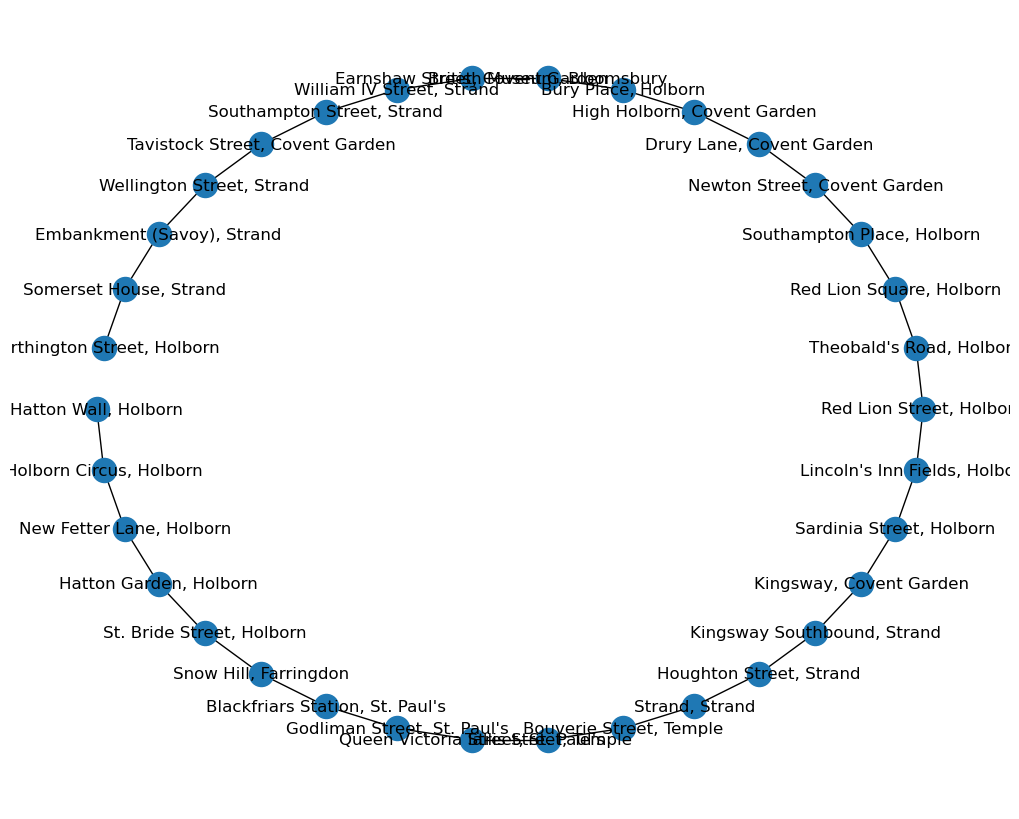

In [32]:
nearestNeighbourGraph = createNetworkGraph(stationsVisited)
drawG(nearestNeighbourGraph)

# MATCH Algorithm

## Form Hamiltonian Cycles

In [33]:
# Hamiltonian Cycles - goes through each station exactly once

# Split the cycle into pieces - positive, negative or 0
# Pick any station to start + or -
# Go clockwise around cycle until reaches trucks capacity = a complete positive piece
# or reaches a negative value, go back one station
# 

# MATCH
# KCapcity is set to Capacity/2
# Minimum weight match between positive and negative pieces (not inluding 0 pieces)
# Match pieces perfectly? P1 TO P1DASH
# Path starts w start node & piece then

# If the piece has a matching piece, go to the bridge node/ node closest in the complement piece
# Visit the other nodes in this piece clockwise
# Continue clockwise around the cycle and repeat^


# Hamiltonian Cycle in nearest order
# SPLIT the cycle into piece
def createHamiltonianCycleNearestNode(g5):
    nodeNamesList = list(g5.nodes())
    stationsVisited = []

    #INITIAL STATION
    nextStation= nodeNamesList[0]
    visitedEveryStation = False

    while not visitedEveryStation:    
        min_weight_neighbors = sorted(g5[nextStation].items(), key=lambda e: e[1]["weight"]) 
        
        nextStationFound = False
        counter = 0
        while ((not nextStationFound) & (counter<len(min_weight_neighbors))):
            potentialStation, potentialWeight = min_weight_neighbors[counter]
            # If we havent been there already
            if (potentialStation not in stationsVisited):
                #distanceTravelled +=g5[nextStation][potentialStation]["weight"]
                nextStation=potentialStation
                #carryingOnVan += g5.nodes[potentialStation]["inventory"]
                #vanInventoryTracker.append(carryingOnVan)

                stationsVisited.append(potentialStation)
                # Havent removed item from the nodeNamesList because we are using it to iterate
                nextStationFound =True

            # Else if it has 0 or - bikes increment counter so we can check the next nearest
            else:
                counter+=1                       
            if (len(stationsVisited)==len(nodeNamesList)):
                visitedEveryStation = True      

    return stationsVisited

createHamiltonianCycleNearestNode(g5)

['Hatton Garden, Holborn',
 'Holborn Circus, Holborn',
 'New Fetter Lane, Holborn',
 'St. Bride Street, Holborn',
 'Snow Hill, Farringdon',
 "Blackfriars Station, St. Paul's",
 "Godliman Street, St. Paul's",
 "Queen Victoria Street, St. Paul's",
 'Tallis Street, Temple',
 'Bouverie Street, Temple',
 'Strand, Strand',
 'Houghton Street, Strand',
 'Kingsway Southbound, Strand',
 'Kingsway, Covent Garden',
 'Sardinia Street, Holborn',
 "Lincoln's Inn Fields, Holborn",
 'Red Lion Street, Holborn',
 "Theobald's Road, Holborn",
 'Red Lion Square, Holborn',
 'Southampton Place, Holborn',
 'Newton Street, Covent Garden',
 'Drury Lane, Covent Garden',
 'High Holborn, Covent Garden',
 'Bury Place, Holborn',
 'British Museum, Bloomsbury',
 'Earnshaw Street, Covent Garden',
 'William IV Street, Strand',
 'Southampton Street, Strand',
 'Tavistock Street, Covent Garden',
 'Wellington Street, Strand',
 'Embankment (Savoy), Strand',
 'Somerset House, Strand',
 'Northington Street, Holborn',
 'Hatton W

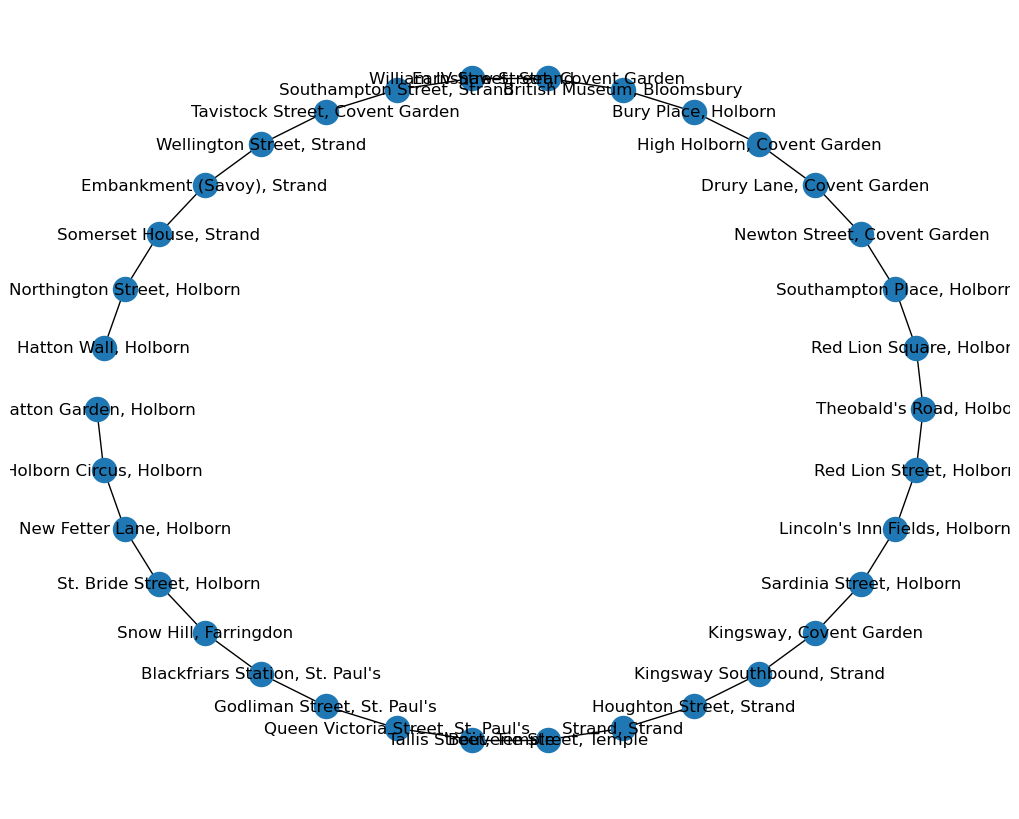

In [34]:
hamiltonianForMatch = createHamiltonianCycleNearestNode(g5)

drawG(createNetworkGraph(hamiltonianForMatch))

In [35]:
hamiltonianForMatch

['Hatton Garden, Holborn',
 'Holborn Circus, Holborn',
 'New Fetter Lane, Holborn',
 'St. Bride Street, Holborn',
 'Snow Hill, Farringdon',
 "Blackfriars Station, St. Paul's",
 "Godliman Street, St. Paul's",
 "Queen Victoria Street, St. Paul's",
 'Tallis Street, Temple',
 'Bouverie Street, Temple',
 'Strand, Strand',
 'Houghton Street, Strand',
 'Kingsway Southbound, Strand',
 'Kingsway, Covent Garden',
 'Sardinia Street, Holborn',
 "Lincoln's Inn Fields, Holborn",
 'Red Lion Street, Holborn',
 "Theobald's Road, Holborn",
 'Red Lion Square, Holborn',
 'Southampton Place, Holborn',
 'Newton Street, Covent Garden',
 'Drury Lane, Covent Garden',
 'High Holborn, Covent Garden',
 'Bury Place, Holborn',
 'British Museum, Bloomsbury',
 'Earnshaw Street, Covent Garden',
 'William IV Street, Strand',
 'Southampton Street, Strand',
 'Tavistock Street, Covent Garden',
 'Wellington Street, Strand',
 'Embankment (Savoy), Strand',
 'Somerset House, Strand',
 'Northington Street, Holborn',
 'Hatton W

# Split hamiltonian cycle into matching +, - and 0 pieces

In [36]:
vanMaxCapacity = 5
minPieceValue = -vanMaxCapacity
carryingOnVan = 0
vanInventoryTracker =[]
#for station in hamiltonianForMatch:

visitedEveryStation = False   
counter = 0
pieceCounter = 1
currentPieceStations= []
currentPieceStationsnoAB= []
tempNewStations = [] #Check these first when moving in a clockwise direction around cycle
piecesDF = pd.DataFrame(columns=["PieceName", "StationsInPiece", "PieceTotal"] )
piecesDFnoAB = pd.DataFrame(columns=["PieceName", "StationsInPiece", "PieceTotal"] )
allNewStations = pd.DataFrame(columns=["StationName", "inventory"] )

# INITIAL
nextStation= hamiltonianForMatch[0]
carryingOnVan = g5.nodes[nextStation]["inventory"]
vanInventoryTracker.append(g5.nodes[nextStation]["inventory"])
stationsVisited.append(nextStation)
currentPieceStations.append(nextStation)
currentPieceStationsnoAB.append(nextStation)

round = 0
while (not visitedEveryStation)&(counter<len(hamiltonianForMatch)):
    print(counter)
    counter+=1
    if (counter<len(hamiltonianForMatch)):
        
        #if (carryingOnVan > vanMaxCapacity):
         #   # Create a virtual Station
         #   currentStation = stationsVisited.tail()
          #  inventoryToSplit = g5.nodes[currentStation]["inventory"] # Inventory of the 
        nextStation = hamiltonianForMatch[counter]
        potentialInventory = g5.nodes[nextStation]["inventory"]
        # Exact Bounds = end the piece     
        if ((carryingOnVan+potentialInventory == 0) or(carryingOnVan+potentialInventory ==vanMaxCapacity) or(carryingOnVan+potentialInventory ==minPieceValue)):
            #Created a 0 piece, 
            # Keep track of travelled station and Van Inventory
            stationsVisited.append(nextStation)
            currentPieceStations.append(nextStation)
            currentPieceStationsnoAB.append(nextStation)
            carryingOnVan+=potentialInventory
            vanInventoryTracker.append(carryingOnVan)
            # End and Reset piece
            whole_piece = ["Piece"+str(pieceCounter),currentPieceStations, carryingOnVan]
            print(whole_piece)
            piecesDF.loc[len(piecesDF)] = whole_piece
            piecesDFnoAB.loc[len(piecesDFnoAB)] = whole_piece
            pieceCounter +=1
            currentPieceStations=[]
            currentPieceStationsnoAB=[]
            carryingOnVan = 0
        # Within Bounds
        elif (carryingOnVan+potentialInventory < vanMaxCapacity) & (carryingOnVan+potentialInventory > minPieceValue)& (carryingOnVan+potentialInventory !=0):
            carryingOnVan += potentialInventory
            vanInventoryTracker.append(carryingOnVan)
            stationsVisited.append(nextStation)
            currentPieceStations.append(nextStation)
            currentPieceStationsnoAB.append(nextStation)
        # Exceeding Bounds = Make virtual Stations    
        elif (carryingOnVan+potentialInventory > vanMaxCapacity):
            # Create a virtual Station
            excessInventory = carryingOnVan+potentialInventory-vanMaxCapacity # Inventory of the new station
            fillToTopInventory = potentialInventory - excessInventory  # Inventory of the station that brings the total to max
            new_stationA = [nextStation+"A",fillToTopInventory]
            new_stationB = [nextStation+"B", excessInventory]
            allNewStations.loc[len(allNewStations)] = new_stationA
            allNewStations.loc[len(allNewStations)] = new_stationB
            currentPieceStations.append(nextStation+"A")
            currentPieceStationsnoAB.append(nextStation)
            tempNewStations.append([nextStation+"A",nextStation+"B"])
            
            stationsVisited.append(nextStation)
            carryingOnVan+=fillToTopInventory
            vanInventoryTracker.append(carryingOnVan)
            whole_piece = ["Piece"+str(pieceCounter),currentPieceStations, carryingOnVan]
            print(whole_piece)
            piecesDF.loc[len(piecesDF)] = whole_piece
            whole_pieceNoAB = ["Piece"+str(pieceCounter),currentPieceStationsnoAB, carryingOnVan]
            piecesDFnoAB.loc[len(piecesDFnoAB)] = whole_pieceNoAB
            # RESET FOR NEW PIECE
            pieceCounter+=1
            currentPieceStations=[nextStation+"B"]
            currentPieceStationsnoAB=[nextStation]
            carryingOnVan = excessInventory
        # Exceeding Bounds = Make virtual Stations     
        elif (carryingOnVan+potentialInventory < minPieceValue):
            # Create a virtual Station
            excessInventory = carryingOnVan+potentialInventory-minPieceValue # Inventory of the new station
            fillToTopInventory = potentialInventory - excessInventory  # Inventory of the station that brings the total to max
            new_stationA = [nextStation+"A",fillToTopInventory]
            new_stationB = [nextStation+"B", excessInventory]
            allNewStations.loc[len(allNewStations)] = new_stationA
            allNewStations.loc[len(allNewStations)] = new_stationB
            currentPieceStations.append(nextStation+"A")
            currentPieceStationsnoAB.append(nextStation)
            tempNewStations.append([nextStation+"A",nextStation+"B"])
            
            stationsVisited.append(nextStation)
            carryingOnVan+=fillToTopInventory
            vanInventoryTracker.append(carryingOnVan)
            print(whole_piece)
            whole_piece = ["Piece"+str(pieceCounter),currentPieceStations, carryingOnVan]
            piecesDF.loc[len(piecesDF)] = whole_piece
            whole_pieceNoAB = ["Piece"+str(pieceCounter),currentPieceStationsnoAB, carryingOnVan]
            piecesDFnoAB.loc[len(piecesDFnoAB)] = whole_pieceNoAB
            # RESET FOR NEW PIECE
            pieceCounter+=1
            currentPieceStations=[nextStation+"B"]
            currentPieceStationsnoAB=[nextStation]
            carryingOnVan = excessInventory

        
        round+=1
    if (len(stationsVisited)==len(hamiltonianForMatch)):
        visitedEveryStation = True
        
if (currentPieceStations !=0):
    print(whole_piece)
    whole_piece = ["Piece"+str(pieceCounter),currentPieceStations, carryingOnVan]
    print(whole_piece)
    piecesDF.loc[len(piecesDF)] = whole_piece
    whole_pieceNoAB = ["Piece"+str(pieceCounter),currentPieceStationsnoAB, carryingOnVan]
    piecesDFnoAB.loc[len(piecesDFnoAB)] = whole_pieceNoAB
        
print(tempNewStations)
print("The Stations Visited were: ",stationsVisited)
print("Van Inventory: ",vanInventoryTracker)

# Pick any station to start + or -
# Go clockwise around cycle until reaches trucks capacity = a complete positive piece
# or reaches a negative value, go back one station
# DF - piece, list of stations & virtual stations in piece, total of piece
# DF - new stations and their inventories - including virtual stations


0
['Piece1', ['Hatton Garden, Holborn', 'Holborn Circus, HolbornA'], 5.0]
1
['Piece2', ['Holborn Circus, HolbornB', 'New Fetter Lane, HolbornA'], 5.0]
2
['Piece3', ['New Fetter Lane, HolbornB', 'St. Bride Street, HolbornA'], 5.0]
3
['Piece4', ['St. Bride Street, HolbornB', 'Snow Hill, FarringdonA'], 5.0]
4
['Piece5', ['Snow Hill, FarringdonB', "Blackfriars Station, St. Paul'sA"], 5.0]
5
['Piece6', ["Blackfriars Station, St. Paul'sB", "Godliman Street, St. Paul'sA"], 5.0]
6
['Piece7', ["Godliman Street, St. Paul'sB", "Queen Victoria Street, St. Paul'sA"], 5.0]
7
['Piece8', ["Queen Victoria Street, St. Paul'sB", 'Tallis Street, TempleA'], 5.0]
8
['Piece9', ['Tallis Street, TempleB', 'Bouverie Street, TempleA'], 5.0]
9
['Piece10', ['Bouverie Street, TempleB', 'Strand, StrandA'], 5.0]
10
['Piece11', ['Strand, StrandB', 'Houghton Street, StrandA'], 5.0]
11
['Piece12', ['Houghton Street, StrandB', 'Kingsway Southbound, StrandA'], 5.0]
12
['Piece13', ['Kingsway Southbound, StrandB', 'Kingsway

In [37]:
piecesDF.index = piecesDF["PieceName"]
piecesDF

PieceName                                    StationsInPiece  \
PieceName                                                                
Piece1       Piece1  [Hatton Garden, Holborn, Holborn Circus, Holbo...   
Piece2       Piece2  [Holborn Circus, HolbornB, New Fetter Lane, Ho...   
Piece3       Piece3  [New Fetter Lane, HolbornB, St. Bride Street, ...   
Piece4       Piece4  [St. Bride Street, HolbornB, Snow Hill, Farrin...   
Piece5       Piece5  [Snow Hill, FarringdonB, Blackfriars Station, ...   
Piece6       Piece6  [Blackfriars Station, St. Paul'sB, Godliman St...   
Piece7       Piece7  [Godliman Street, St. Paul'sB, Queen Victoria ...   
Piece8       Piece8  [Queen Victoria Street, St. Paul'sB, Tallis St...   
Piece9       Piece9  [Tallis Street, TempleB, Bouverie Street, Temp...   
Piece10     Piece10        [Bouverie Street, TempleB, Strand, StrandA]   
Piece11     Piece11        [Strand, StrandB, Houghton Street, StrandA]   
Piece12     Piece12  [Houghton Street, StrandB, Kingsway Southbound...   
Piece13     Piece13  [Kingsway Southbound, StrandB, Kingsway, Coven...   
Piece14     Piece14  [Kingsway, Covent GardenB, Sardinia Street, Ho...   
Piece15     Piece15  [Sardinia Street, HolbornB, Lincoln's Inn Fiel...   
Piece16     Piece16  [Lincoln's Inn Fields, HolbornB, Red Lion Stre...   
Piece17     Piece17  [Red Lion Street, HolbornB, Theobald's Road, H...   
Piece18     Piece18  [Theobald's Road, HolbornB, Red Lion Square, H...   
Piece19     Piece19  [Red Lion Square, HolbornB, Southampton Place,...   
Piece20     Piece20  [Southampton Place, HolbornB, Newton Street, C...   
Piece21     Piece21  [Newton Street, Covent GardenB, Drury Lane, Co...   
Piece22     Piece22  [Drury Lane, Covent GardenB, High Holborn, Cov...   
Piece23     Piece23  [High Holborn, Covent GardenB, Bury Place, Hol...   
Piece24     Piece24  [Bury Place, HolbornB, British Museum, Bloomsb...   
Piece25     Piece25  [British Museum, BloomsburyB, Earnshaw Street,...   
Piece26     Piece26  [Earnshaw Street, Covent GardenB, William IV S...   
Piece27     Piece27  [William IV Street, StrandB, Southampton Stree...   
Piece28     Piece28  [Southampton Street, StrandB, Tavistock Street...   
Piece29     Piece29  [Tavistock Street, Covent GardenB, Wellington ...   
Piece30     Piece30  [Wellington Street, StrandB, Embankment (Savoy...   
Piece31     Piece31  [Embankment (Savoy), StrandB, Somerset House, ...   
Piece32     Piece32  [Somerset House, StrandB, Northington Street, ...   
Piece33     Piece33  [Northington Street, HolbornB, Hatton Wall, Ho...   
Piece34     Piece34                            [Hatton Wall, HolbornB]   

           PieceTotal  
PieceName              
Piece1            5.0  
Piece2            5.0  
Piece3            5.0  
Piece4            5.0  
Piece5            5.0  
Piece6            5.0  
Piece7            5.0  
Piece8            5.0  
Piece9            5.0  
Piece10           5.0  
Piece11           5.0  
Piece12           5.0  
Piece13           5.0  
Piece14           5.0  
Piece15           5.0  
Piece16           5.0  
Piece17           5.0  
Piece18           5.0  
Piece19           5.0  
Piece20           5.0  
Piece21           5.0  
Piece22           5.0  
Piece23           5.0  
Piece24           5.0  
Piece25           5.0  
Piece26           5.0  
Piece27           5.0  
Piece28           5.0  
Piece29           5.0  
Piece30           5.0  
Piece31           5.0  
Piece32           5.0  
Piece33           5.0  
Piece34          41.0

In [38]:
piecesDF["StationsInPiece"].tolist

<bound method IndexOpsMixin.tolist of PieceName
Piece1     [Hatton Garden, Holborn, Holborn Circus, Holbo...
Piece2     [Holborn Circus, HolbornB, New Fetter Lane, Ho...
Piece3     [New Fetter Lane, HolbornB, St. Bride Street, ...
Piece4     [St. Bride Street, HolbornB, Snow Hill, Farrin...
Piece5     [Snow Hill, FarringdonB, Blackfriars Station, ...
Piece6     [Blackfriars Station, St. Paul'sB, Godliman St...
Piece7     [Godliman Street, St. Paul'sB, Queen Victoria ...
Piece8     [Queen Victoria Street, St. Paul'sB, Tallis St...
Piece9     [Tallis Street, TempleB, Bouverie Street, Temp...
Piece10          [Bouverie Street, TempleB, Strand, StrandA]
Piece11          [Strand, StrandB, Houghton Street, StrandA]
Piece12    [Houghton Street, StrandB, Kingsway Southbound...
Piece13    [Kingsway Southbound, StrandB, Kingsway, Coven...
Piece14    [Kingsway, Covent GardenB, Sardinia Street, Ho...
Piece15    [Sardinia Street, HolbornB, Lincoln's Inn Fiel...
Piece16    [Lincoln's Inn Fields, Hol

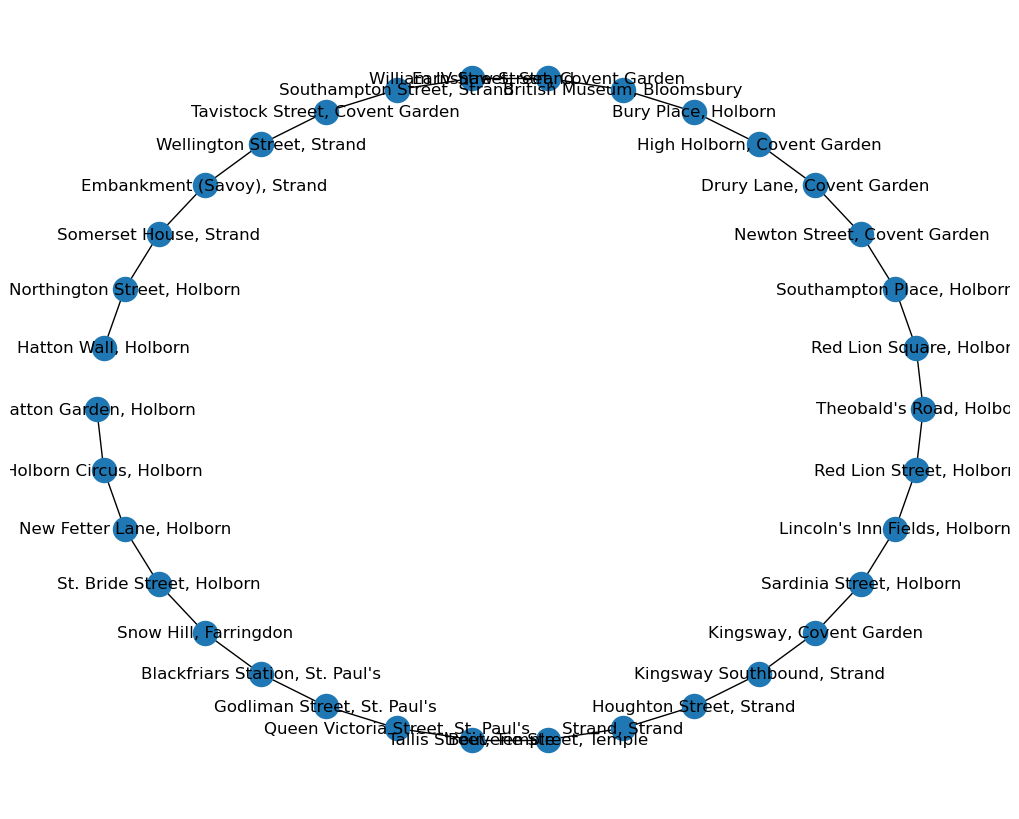

In [39]:
hamiltonianForMatch = createHamiltonianCycleNearestNode(g5)
hamilGraph = createNetworkGraph(hamiltonianForMatch)

drawG(hamilGraph)

#figure(figsize=(10, 8))
#nx.draw_shell(hamilGraph, with_labels=True)

#G = nx.cycle_graph(24)
#pos = nx.circular_layout(hamiltonianForMatch)

#nx.draw(hamilGraph, pos, node_color=range(18), node_size=800, cmap=plt.cm.Blues)
#plt.show()

In [40]:
piecesDFnoAB.index = piecesDFnoAB["PieceName"]
#piecesDFnoAB.at["Piece7", "StationsInPiece"]
#piecesDFnoAB.at["Piece8", "StationsInPiece"]
#piecesDFnoAB

In [41]:
#piecesDF.loc[piecesDF["PieceName"].isin(["Piece1"])]["StationsInPiece"]
#piecesDF.at["Piece1", "StationsInPiece"][len(piecesDF.at["Piece1", "StationsInPiece"])-1]
#piecesDF.at["Piece7", "StationsInPiece"]

# MATCH Algorithm

In [42]:
def formatName(nameStr):
    if (nameStr[len(nameStr)-1]=="A" or nameStr[len(nameStr)-1]=="B"):
        return nameStr[:-1] 
    else: return nameStr 

In [43]:
# MATCH
# KCapcity is set to Capacity/2
# Minimum weight match between positive and negative pieces (not inluding 0 pieces)
# Match pieces perfectly? P1 TO P1DASH
# Path starts w start node & piece then

# If the piece has a matching piece, go to the bridge node/ node closest in the complement piece
# Visit the other nodes in this piece clockwise
# Continue clockwise around the cycle and repeat^

distanceTravelled = 0
hamiltonianForMatch

piecesDF

def distanceWithinPiece(pieceName):
    distanceInPiece = 0
    piecesDF.loc[piecesDF["PieceName"].isin([pieceName])]
    stationListInPiece = piecesDF.at[pieceName, "StationsInPiece"]
    
    for i in range(len(stationListInPiece)):
        if i+1<len(stationListInPiece):
            stationA = formatName(stationListInPiece[i])
            stationB = formatName(stationListInPiece[i+1])
            distanceInPiece+= distMatrixDF.loc[stationA, stationB]
            
    return distanceInPiece

distanceWithinPiece("Piece1")

0.0010176644830183583

In [44]:
# Initial piece
carryingOnVan = 0
visitedPieces = []
zeroPieces = []
vanInventoryTracker = []
#for x in range(len(piecesDF)):
visitedEveryPiece =False
counter = 0
while (not visitedEveryPiece):
    print("Van Inventory: ",vanInventoryTracker) 
    for index,row in piecesDF.iterrows():
        if ((not row["PieceName"] in visitedPieces) & (not row["PieceName"] in zeroPieces)):
            if (row["PieceTotal"]==0):
                currentPiece = row
                currentPieceName = row["PieceName"]
                carryingOnVan += row["PieceTotal"]
                vanInventoryTracker.append(carryingOnVan)
                zeroPieces.append(currentPieceName)
                #visitedPieces.append(currentPieceName)
            elif ((row["PieceTotal"]==-carryingOnVan) or (row["PieceTotal"]+carryingOnVan>0)):
                currentPiece = row
                currentPieceName = row["PieceName"]
                carryingOnVan += row["PieceTotal"]
                vanInventoryTracker.append(carryingOnVan)
                visitedPieces.append(currentPieceName)
            elif (row["PieceTotal"]+carryingOnVan>0):
                currentPiece = row
                currentPieceName = row["PieceName"]
                carryingOnVan += row["PieceTotal"]
                vanInventoryTracker.append(carryingOnVan)
                visitedPieces.append(currentPieceName)
                   
    if (len(visitedPieces)+len(zeroPieces) == len(piecesDF)):
        visitedEveryPiece = True
    
print("The pieces Visited were: ",visitedPieces)
print("The 0 pieces were: ",zeroPieces)
print("Van Inventory: ",vanInventoryTracker)    

Van Inventory:  []
The pieces Visited were:  ['Piece1', 'Piece2', 'Piece3', 'Piece4', 'Piece5', 'Piece6', 'Piece7', 'Piece8', 'Piece9', 'Piece10', 'Piece11', 'Piece12', 'Piece13', 'Piece14', 'Piece15', 'Piece16', 'Piece17', 'Piece18', 'Piece19', 'Piece20', 'Piece21', 'Piece22', 'Piece23', 'Piece24', 'Piece25', 'Piece26', 'Piece27', 'Piece28', 'Piece29', 'Piece30', 'Piece31', 'Piece32', 'Piece33', 'Piece34']
The 0 pieces were:  []
Van Inventory:  [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 206.0]


In [45]:
totalDistance = 0
specificStationVisits = []
visitedNow = []
#for pieceName in visitedPieces: 
for i in range(len(visitedPieces)):
        if i+1<len(visitedPieces):
            pieceName = visitedPieces[i]
            lastVisitedInPiece = formatName(piecesDF.at[pieceName, "StationsInPiece"][len(piecesDF.at[pieceName, "StationsInPiece"])-1])
            min_weight_neighbors = sorted(g5[lastVisitedInPiece].items(), key=lambda e: e[1]["weight"]) 
            specificStationVisits.append(lastVisitedInPiece)
            
            nextPiece = visitedPieces[i+1]
            visitedNow.append([pieceName, nextPiece])
            for nStation in min_weight_neighbors:
                if nStation in piecesDFnoAB.at[nextPiece, "StationsInPiece"]:
                    bridgeStation = nStation
                    specificStationVisits.append(bridgeStation)
                    break
            
for j in range(0,len(specificStationVisits)):
        if j+1<len(specificStationVisits): 
                stationA = specificStationVisits[j]
                stationB = specificStationVisits[j+1]
                if (stationA != stationB):
                    totalDistance+=g5[stationA][stationB]["weight"]                
            #currentPiece["PieceTotal"]
            
for piece in visitedPieces:
    totalDistance+=distanceWithinPiece(formatName(piece))

print(specificStationVisits)
print("TOTAL DISTANCE TRAVELLED MATCH:",totalDistance)
print(visitedNow)

['Holborn Circus, Holborn', 'New Fetter Lane, Holborn', 'St. Bride Street, Holborn', 'Snow Hill, Farringdon', "Blackfriars Station, St. Paul's", "Godliman Street, St. Paul's", "Queen Victoria Street, St. Paul's", 'Tallis Street, Temple', 'Bouverie Street, Temple', 'Strand, Strand', 'Houghton Street, Strand', 'Kingsway Southbound, Strand', 'Kingsway, Covent Garden', 'Sardinia Street, Holborn', "Lincoln's Inn Fields, Holborn", 'Red Lion Street, Holborn', "Theobald's Road, Holborn", 'Red Lion Square, Holborn', 'Southampton Place, Holborn', 'Newton Street, Covent Garden', 'Drury Lane, Covent Garden', 'High Holborn, Covent Garden', 'Bury Place, Holborn', 'British Museum, Bloomsbury', 'Earnshaw Street, Covent Garden', 'William IV Street, Strand', 'Southampton Street, Strand', 'Tavistock Street, Covent Garden', 'Wellington Street, Strand', 'Embankment (Savoy), Strand', 'Somerset House, Strand', 'Northington Street, Holborn', 'Hatton Wall, Holborn']
TOTAL DISTANCE TRAVELLED MATCH: 0.2132161929

In [46]:
len(piecesDF)

34

# GREED Algorithm

In [47]:
# Hamiltonian Cycles - goes through each station exactly once
# start at positive station - either positive piece or zero piece
# if positive piece, find nearest negative piece or positive zero piece
# if end up in negative piece, find nearest positive station
 
def greedRebalancePath(g5, totalChangeInCluster):
    totalChangeInCluster = totalChangeInCluster # Is defined above    
    distanceTravelled = 0
    carryingOnVan = 0
    vanMaxCapacity = 2000000000
    vanInventoryTracker =[]
    stationsVisited = []

    # Remove Nodes w 0 change in inventory - that dont need repositioning
    g5.nodes()

    nodeNamesList = list(g5.nodes())
    visitedEveryStation = False

    #INITIAL STATION
    nextStation= nodeNamesList[0]
    carryingOnVan = g5.nodes[nextStation]["inventory"]
    vanInventoryTracker.append(g5.nodes[nextStation]["inventory"])
    stationsVisited.append(nextStation)


    while not visitedEveryStation:    
        min_weight_neighbors = sorted(g5[nextStation].items(), key=lambda e: e[1]["weight"]) 

        if ((carryingOnVan==0) or (carryingOnVan<0)):
            nextStationFound = False
            counter = 0
            while ((not nextStationFound) & (counter<len(min_weight_neighbors))):
                potentialStation, potentialWeight = min_weight_neighbors[counter]
                #print(potentialStation)
                # If the nearest Station has + surplus bikes, go there because van has 0
                if (g5.nodes[potentialStation]["inventory"]>0) & (potentialStation not in stationsVisited):
                    distanceTravelled +=g5[nextStation][potentialStation]["weight"]
                    nextStation=potentialStation
                    carryingOnVan += g5.nodes[potentialStation]["inventory"]

                    vanInventoryTracker.append(carryingOnVan)
                    stationsVisited.append(potentialStation)
                    # Havent removed item from the nodeNamesList because we are using it to iterate
                    nextStationFound =True

                # Else if it has 0 or - bikes increment counter so we can check the next nearest
                else:
                    counter+=1

        if (carryingOnVan > 0):
            counter2 = 0
            nextStationFound2 = False
            while (not nextStationFound2 & (counter2<len(min_weight_neighbors))):
                potentialStation, potentialWeight = min_weight_neighbors[counter2]
                #print(potentialStation)
                # If the nearest Station has + surplus bikes, go there because van has 0
                potentialInventory = g5.nodes[potentialStation]["inventory"]
                if ((carryingOnVan+potentialInventory < vanMaxCapacity) & (carryingOnVan+potentialInventory > 0)& (potentialStation not in stationsVisited)):
                    distanceTravelled +=g5[nextStation][potentialStation]["weight"]
                    nextStation=potentialStation
                    carryingOnVan += g5.nodes[potentialStation]["inventory"]

                    vanInventoryTracker.append(carryingOnVan)
                    stationsVisited.append(potentialStation)
                    # Havent removed item from the nodeNamesList because we are using it to iterate
                    nextStationFound2 =True

                # Else if it has 0 or - bikes increment counter so we can check the next nearest
                else:
                    counter2+=1

        #if len(stationsVisited) == len(nodeNamesList):
        if ((carryingOnVan == totalChangeInCluster) or (len(stationsVisited)==len(nodeNamesList))):
            visitedEveryStation = True


    print("Nodes Visited: ", stationsVisited)
    print("Van Inventory was: ",vanInventoryTracker)
    print("Total Distance Travelled: ",distanceTravelled)
    
    return stationsVisited

greedStationsVisited = greedRebalancePath(g5, totalChangeInCluster)

Nodes Visited:  ['Hatton Wall, Holborn', 'Holborn Circus, Holborn', 'New Fetter Lane, Holborn', 'Hatton Garden, Holborn', 'St. Bride Street, Holborn', 'Snow Hill, Farringdon', "Blackfriars Station, St. Paul's", "Godliman Street, St. Paul's", "Queen Victoria Street, St. Paul's", 'Tallis Street, Temple', 'Bouverie Street, Temple', 'Strand, Strand', 'Houghton Street, Strand', 'Kingsway Southbound, Strand', 'Kingsway, Covent Garden', 'Sardinia Street, Holborn', "Lincoln's Inn Fields, Holborn", 'Red Lion Street, Holborn', "Theobald's Road, Holborn", 'Red Lion Square, Holborn', 'Southampton Place, Holborn', 'Newton Street, Covent Garden', 'Drury Lane, Covent Garden', 'High Holborn, Covent Garden', 'Bury Place, Holborn', 'British Museum, Bloomsbury', 'Earnshaw Street, Covent Garden', 'William IV Street, Strand', 'Southampton Street, Strand', 'Tavistock Street, Covent Garden', 'Wellington Street, Strand', 'Embankment (Savoy), Strand', 'Somerset House, Strand', 'Northington Street, Holborn']
Va